<a href="https://colab.research.google.com/github/Vishnu151/Comprehensive-Risk-Analysis-Report-for-Loan-Defaults/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OBJECTIVE
The intent of this presentation is to analyze loan default tendencies using data-driven insights to enhance risk assessment strategies in lending institutions.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from scipy.stats import chi2_contingency

In [3]:
data = pd.read_csv('/content/loan.csv')

In [4]:
data.head()

,ID,year,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,type1,p1,nob/c,116500,NaN,NaN,118000.0,pr,1740.0,EXP,758,CIB,25-34,98.728814,south,1
1,24891,2019,cf,Male,type2,p1,b/c,206500,NaN,NaN,NaN,pr,4980.0,EQUI,552,EXP,55-64,NaN,North,1
2,24892,2019,cf,Male,type1,p1,nob/c,406500,4.56,595.0,508000.0,pr,9480.0,EXP,834,CIB,35-44,80.019685,south,0
3,24893,2019,cf,Male,type1,p4,nob/c,456500,4.25,NaN,658000.0,pr,11880.0,EXP,587,CIB,45-54,69.376900,North,0
4,24894,2019,cf,Joint,type1,p1,nob/c,696500,4.00,0.0,758000.0,pr,10440.0,CRIF,602,EXP,25-34,91.886544,North,0


In [5]:
data.shape

(148670, 20)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        148670 non-null  int64  
 1   year                      148670 non-null  int64  
 2   loan_limit                145326 non-null  object 
 3   Gender                    148670 non-null  object 
 4   loan_type                 148670 non-null  object 
 5   loan_purpose              148536 non-null  object 
 6   business_or_commercial    148670 non-null  object 
 7   loan_amount               148670 non-null  int64  
 8   rate_of_interest          112231 non-null  float64
 9   Upfront_charges           109028 non-null  float64
 10  property_value            133572 non-null  float64
 11  occupancy_type            148670 non-null  object 
 12  income                    139520 non-null  float64
 13  credit_type               148670 non-null  o

In [7]:
data.describe()

,ID,year,loan_amount,rate_of_interest,Upfront_charges,property_value,income,Credit_Score,LTV,Status
count,148670.000000,148670.0,1.486700e+05,112231.000000,109028.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,3224.996127,4.978935e+05,6957.338876,699.789103,72.746457,0.246445
std,42917.476598,0.0,1.839093e+05,0.561391,3251.121510,3.599353e+05,6496.586382,115.875857,39.967603,0.430942
min,24890.000000,2019.0,1.650000e+04,0.000000,0.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,581.490000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,2596.450000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,4812.500000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,60000.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000


In [8]:
data.describe(include = 'object')

,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,occupancy_type,credit_type,co-applicant_credit_type,age,Region
count,145326,148670,148670,148536,148670,148670,148670,148670,148470,148670
unique,2,4,3,4,2,3,4,2,7,4
top,cf,Male,type1,p3,nob/c,pr,CIB,CIB,45-54,North
freq,135348,42346,113173,55934,127908,138201,48152,74392,34720,74722


In [9]:
data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'loan_type', 'loan_purpose',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Upfront_charges', 'property_value', 'occupancy_type', 'income',
       'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'LTV',
       'Region', 'Status'],
      dtype='object')

In [10]:
data.rename(columns = {'year':'Year','loan_limit':'Loan_Limit','loan_type':'Loan_Type',
                       'loan_purpose':'Loan_Purpose','business_or_commercial':'Business_or_Commercial',
                       'loan_amount':'Loan_Amount','rate_of_interest':'Rate_of_Interest',
                       'Upfront_charges':'Upfront_Charges', 'property_value':'Property_Value',
                       'occupancy_type':'Occupancy_Type', 'income':'Income',
                       'credit_type':'Credit_Type','co-applicant_credit_type':'Co-Applicant_Credit_Type',
                       'age':'Age'}, inplace = True)

In [11]:
data.columns

Index(['ID', 'Year', 'Loan_Limit', 'Gender', 'Loan_Type', 'Loan_Purpose',
       'Business_or_Commercial', 'Loan_Amount', 'Rate_of_Interest',
       'Upfront_Charges', 'Property_Value', 'Occupancy_Type', 'Income',
       'Credit_Type', 'Credit_Score', 'Co-Applicant_Credit_Type', 'Age', 'LTV',
       'Region', 'Status'],
      dtype='object')

In [12]:
data.drop('ID',inplace=True,axis=1)

In [13]:
data['Status'] = data['Status'].astype(str)

In [14]:
for i in data.columns:
  print('Value count of',i,'column:')
  print(data[i].value_counts())
  print('-'*50)

Value count of Year column:
Year
2019    148670
Name: count, dtype: int64
--------------------------------------------------
Value count of Loan_Limit column:
Loan_Limit
cf     135348
ncf      9978
Name: count, dtype: int64
--------------------------------------------------
Value count of Gender column:
Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64
--------------------------------------------------
Value count of Loan_Type column:
Loan_Type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64
--------------------------------------------------
Value count of Loan_Purpose column:
Loan_Purpose
p3    55934
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64
--------------------------------------------------
Value count of Business_or_Commercial column:
Business_or_Commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64
----------------------------------

In [15]:
data.isnull().sum()

,0
Year,0
Loan_Limit,3344
Gender,0
Loan_Type,0
Loan_Purpose,134
Business_or_Commercial,0
Loan_Amount,0
Rate_of_Interest,36439
Upfront_Charges,39642
Property_Value,15098


In [16]:
# Checking the number of nulls and unique values in Loan_Limit
print("Null values in Loan_Limit:", data['Loan_Limit'].isnull().sum())
print("Unique values in Loan_Limit:", data['Loan_Limit'].unique())

Null values in Loan_Limit: 3344
Unique values in Loan_Limit: ['cf' nan 'ncf']


In [17]:
data.groupby('Loan_Type')['Loan_Limit'].value_counts(dropna=False)

Loan_Type  Loan_Limit
type1      cf            103424
           ncf             7204
           NaN             2545
type2      cf             19116
           ncf             1101
           NaN              545
type3      cf             12808
           ncf             1673
           NaN              254
Name: count, dtype: int64

In [18]:
data['Loan_Limit'] = data.groupby('Loan_Type')['Loan_Limit'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'cf'))

In [19]:
data.groupby('Loan_Type')['Loan_Limit'].value_counts(dropna=False)

Loan_Type  Loan_Limit
type1      cf            105969
           ncf             7204
type2      cf             19661
           ncf             1101
type3      cf             13062
           ncf             1673
Name: count, dtype: int64

In [20]:
data['Loan_Purpose'].value_counts(dropna = False)

,count
Loan_Purpose,
p3,55934
p4,54799
p1,34529
p2,3274
NaN,134


In [21]:
mode_val = data['Loan_Purpose'].mode()[0]
data['Loan_Purpose'].fillna(mode_val, inplace=True)

In [22]:
data['Loan_Purpose'].value_counts(dropna = False)

,count
Loan_Purpose,
p3,56068
p4,54799
p1,34529
p2,3274


In [23]:
# Checking correlations or patterns with other columns
# Temporarily encoding categorical columns to numeric
data_encoded = data.copy()
data_encoded['Loan_Type'] = data_encoded['Loan_Type'].astype('category').cat.codes
data_encoded['Loan_Purpose'] = data_encoded['Loan_Purpose'].astype('category').cat.codes

# Now check correlation, including these encoded columns
data_encoded[['Rate_of_Interest', 'Loan_Type', 'Loan_Amount', 'Loan_Purpose']].corr()


,Rate_of_Interest,Loan_Type,Loan_Amount,Loan_Purpose
Rate_of_Interest,1.000000,-0.267358,-0.150844,-0.250109
Loan_Type,-0.267358,1.000000,-0.072201,0.019610
Loan_Amount,-0.150844,-0.072201,1.000000,0.066663
Loan_Purpose,-0.250109,0.019610,0.066663,1.000000


In [24]:
df = data[data['Rate_of_Interest'].isna()]

In [25]:
df['Loan_Type'].value_counts()

,count
Loan_Type,
type1,25739
type2,7013
type3,3687


In [26]:
data['Rate_of_Interest'] = data.groupby('Loan_Type')['Rate_of_Interest'].transform(lambda x: x.fillna(x.mean()))

In [27]:
df = data[data['Rate_of_Interest'].isna()]
df['Loan_Type'].value_counts()

,count
Loan_Type,


In [28]:
data['Upfront_Charges'].value_counts(dropna=False)

,count
Upfront_Charges,
NaN,39642
0.00,20770
1250.00,1184
1150.00,892
795.00,487
...,...
4447.72,1
3173.84,1
3421.81,1


In [29]:
data.groupby('Loan_Type')['Upfront_Charges'].value_counts(dropna=False)

Loan_Type  Upfront_Charges
type1      NaN                28274
           0.00               13287
           1250.00             1182
           1150.00              889
           795.00               487
                              ...  
type3      23415.67               1
           26577.00               1
           29725.00               1
           32850.00               1
           53485.78               1
Name: count, Length: 60804, dtype: int64

In [30]:
data['Upfront_Charges'] = data.groupby('Loan_Type')['Upfront_Charges'].transform(lambda x: x.fillna(x.mean()))

In [31]:
data['Upfront_Charges'].isna().sum()

0

In [32]:
data['Property_Value'].value_counts(dropna= False)

,count
Property_Value,
NaN,15098
308000.0,2792
258000.0,2763
358000.0,2679
408000.0,2537
...,...
4648000.0,1
3878000.0,1
5758000.0,1


In [33]:
data['Property_Value'] = data.groupby(['Region', 'Loan_Type'])['Property_Value'].transform(lambda x: x.fillna(x.median()))

In [34]:
data['Property_Value'].value_counts(dropna= False)

,count
Property_Value,
458000.0,7558
478000.0,6845
268000.0,4760
358000.0,4411
308000.0,2792
...,...
4648000.0,1
3878000.0,1
5758000.0,1


In [35]:
data['Income'].value_counts(dropna= False)

,count
Income,
NaN,9150
0.0,1260
3600.0,1250
4200.0,1243
4800.0,1191
...,...
45300.0,1
154440.0,1
137760.0,1


In [36]:
data_encoded = data.copy()
data_encoded['Loan_Type'] = data_encoded['Loan_Type'].astype('category').cat.codes
data_encoded['Region'] = data_encoded['Region'].astype('category').cat.codes

# Now check correlation, including these encoded columns
data_encoded[['Income', 'Loan_Type', 'Region']].corr()

,Income,Loan_Type,Region
Income,1.000000,-0.145614,-0.000046
Loan_Type,-0.145614,1.000000,-0.001210
Region,-0.000046,-0.001210,1.000000


In [37]:
data['Income'] = data.groupby(['Region', 'Loan_Type'])['Income'].transform(lambda x: x.fillna(x.median()))

In [38]:
data['Income'].isna().sum()

0

In [39]:
data['Age'].isna().sum()

200

In [40]:
data[data['Age'].isna()].head()

,Year,Loan_Limit,Gender,Loan_Type,Loan_Purpose,Business_or_Commercial,Loan_Amount,Rate_of_Interest,Upfront_Charges,Property_Value,Occupancy_Type,Income,Credit_Type,Credit_Score,Co-Applicant_Credit_Type,Age,LTV,Region,Status
266,2019,ncf,Sex Not Available,type2,p1,b/c,196500,3.750,0.00,198000.0,pr,3900.0,EQUI,768,EXP,NaN,99.242424,south,1
706,2019,ncf,Sex Not Available,type1,p1,nob/c,126500,4.625,3557.92,168000.0,pr,6240.0,EQUI,845,EXP,NaN,75.297619,south,1
1150,2019,ncf,Sex Not Available,type2,p3,b/c,176500,3.750,0.00,218000.0,pr,3900.0,EQUI,572,EXP,NaN,80.963303,south,1
1219,2019,ncf,Sex Not Available,type2,p3,b/c,346500,4.500,2062.49,418000.0,pr,3900.0,EQUI,864,EXP,NaN,82.894737,south,1
3533,2019,ncf,Sex Not Available,type2,p3,b/c,146500,3.875,1128.66,178000.0,pr,3900.0,EQUI,540,EXP,NaN,82.303371,south,1


In [41]:
data_encoded = data.copy()
data_encoded['Loan_Type'] = data_encoded['Loan_Type'].astype('category').cat.codes
data_encoded['Age'] = data_encoded['Age'].astype('category').cat.codes
data_encoded[['Loan_Type','Income','Age']].corr()

,Loan_Type,Income,Age
Loan_Type,1.000000,-0.171700,0.068213
Income,-0.171700,1.000000,-0.093788
Age,0.068213,-0.093788,1.000000


In [42]:
data['Age'].value_counts(dropna = False)

,count
Age,
45-54,34720
35-44,32818
55-64,32534
65-74,20744
25-34,19142
>74,7175
<25,1337
NaN,200


In [43]:
# Fill NaN values with a new category
data['Age'].fillna('Missing', inplace=True)

In [44]:
data['Age'].value_counts(dropna=False)

,count
Age,
45-54,34720
35-44,32818
55-64,32534
65-74,20744
25-34,19142
>74,7175
<25,1337
Missing,200


In [45]:
data['Age'].isna().sum()

0

In [46]:
data['LTV'].isna().sum()

15098

In [47]:
data[['Loan_Amount','Property_Value','LTV']].head()

,Loan_Amount,Property_Value,LTV
0,116500,118000.0,98.728814
1,206500,268000.0,NaN
2,406500,508000.0,80.019685
3,456500,658000.0,69.376900
4,696500,758000.0,91.886544


In [48]:
data['LTV'] = data['LTV'].fillna((data['Loan_Amount']/data['Property_Value'])*100)

In [49]:
data['LTV'].isna().sum()

0

In [50]:
data.isna().sum()

,0
Year,0
Loan_Limit,0
Gender,0
Loan_Type,0
Loan_Purpose,0
Business_or_Commercial,0
Loan_Amount,0
Rate_of_Interest,0
Upfront_Charges,0
Property_Value,0


In [51]:
data.dtypes

,0
Year,int64
Loan_Limit,object
Gender,object
Loan_Type,object
Loan_Purpose,object
Business_or_Commercial,object
Loan_Amount,int64
Rate_of_Interest,float64
Upfront_Charges,float64
Property_Value,float64


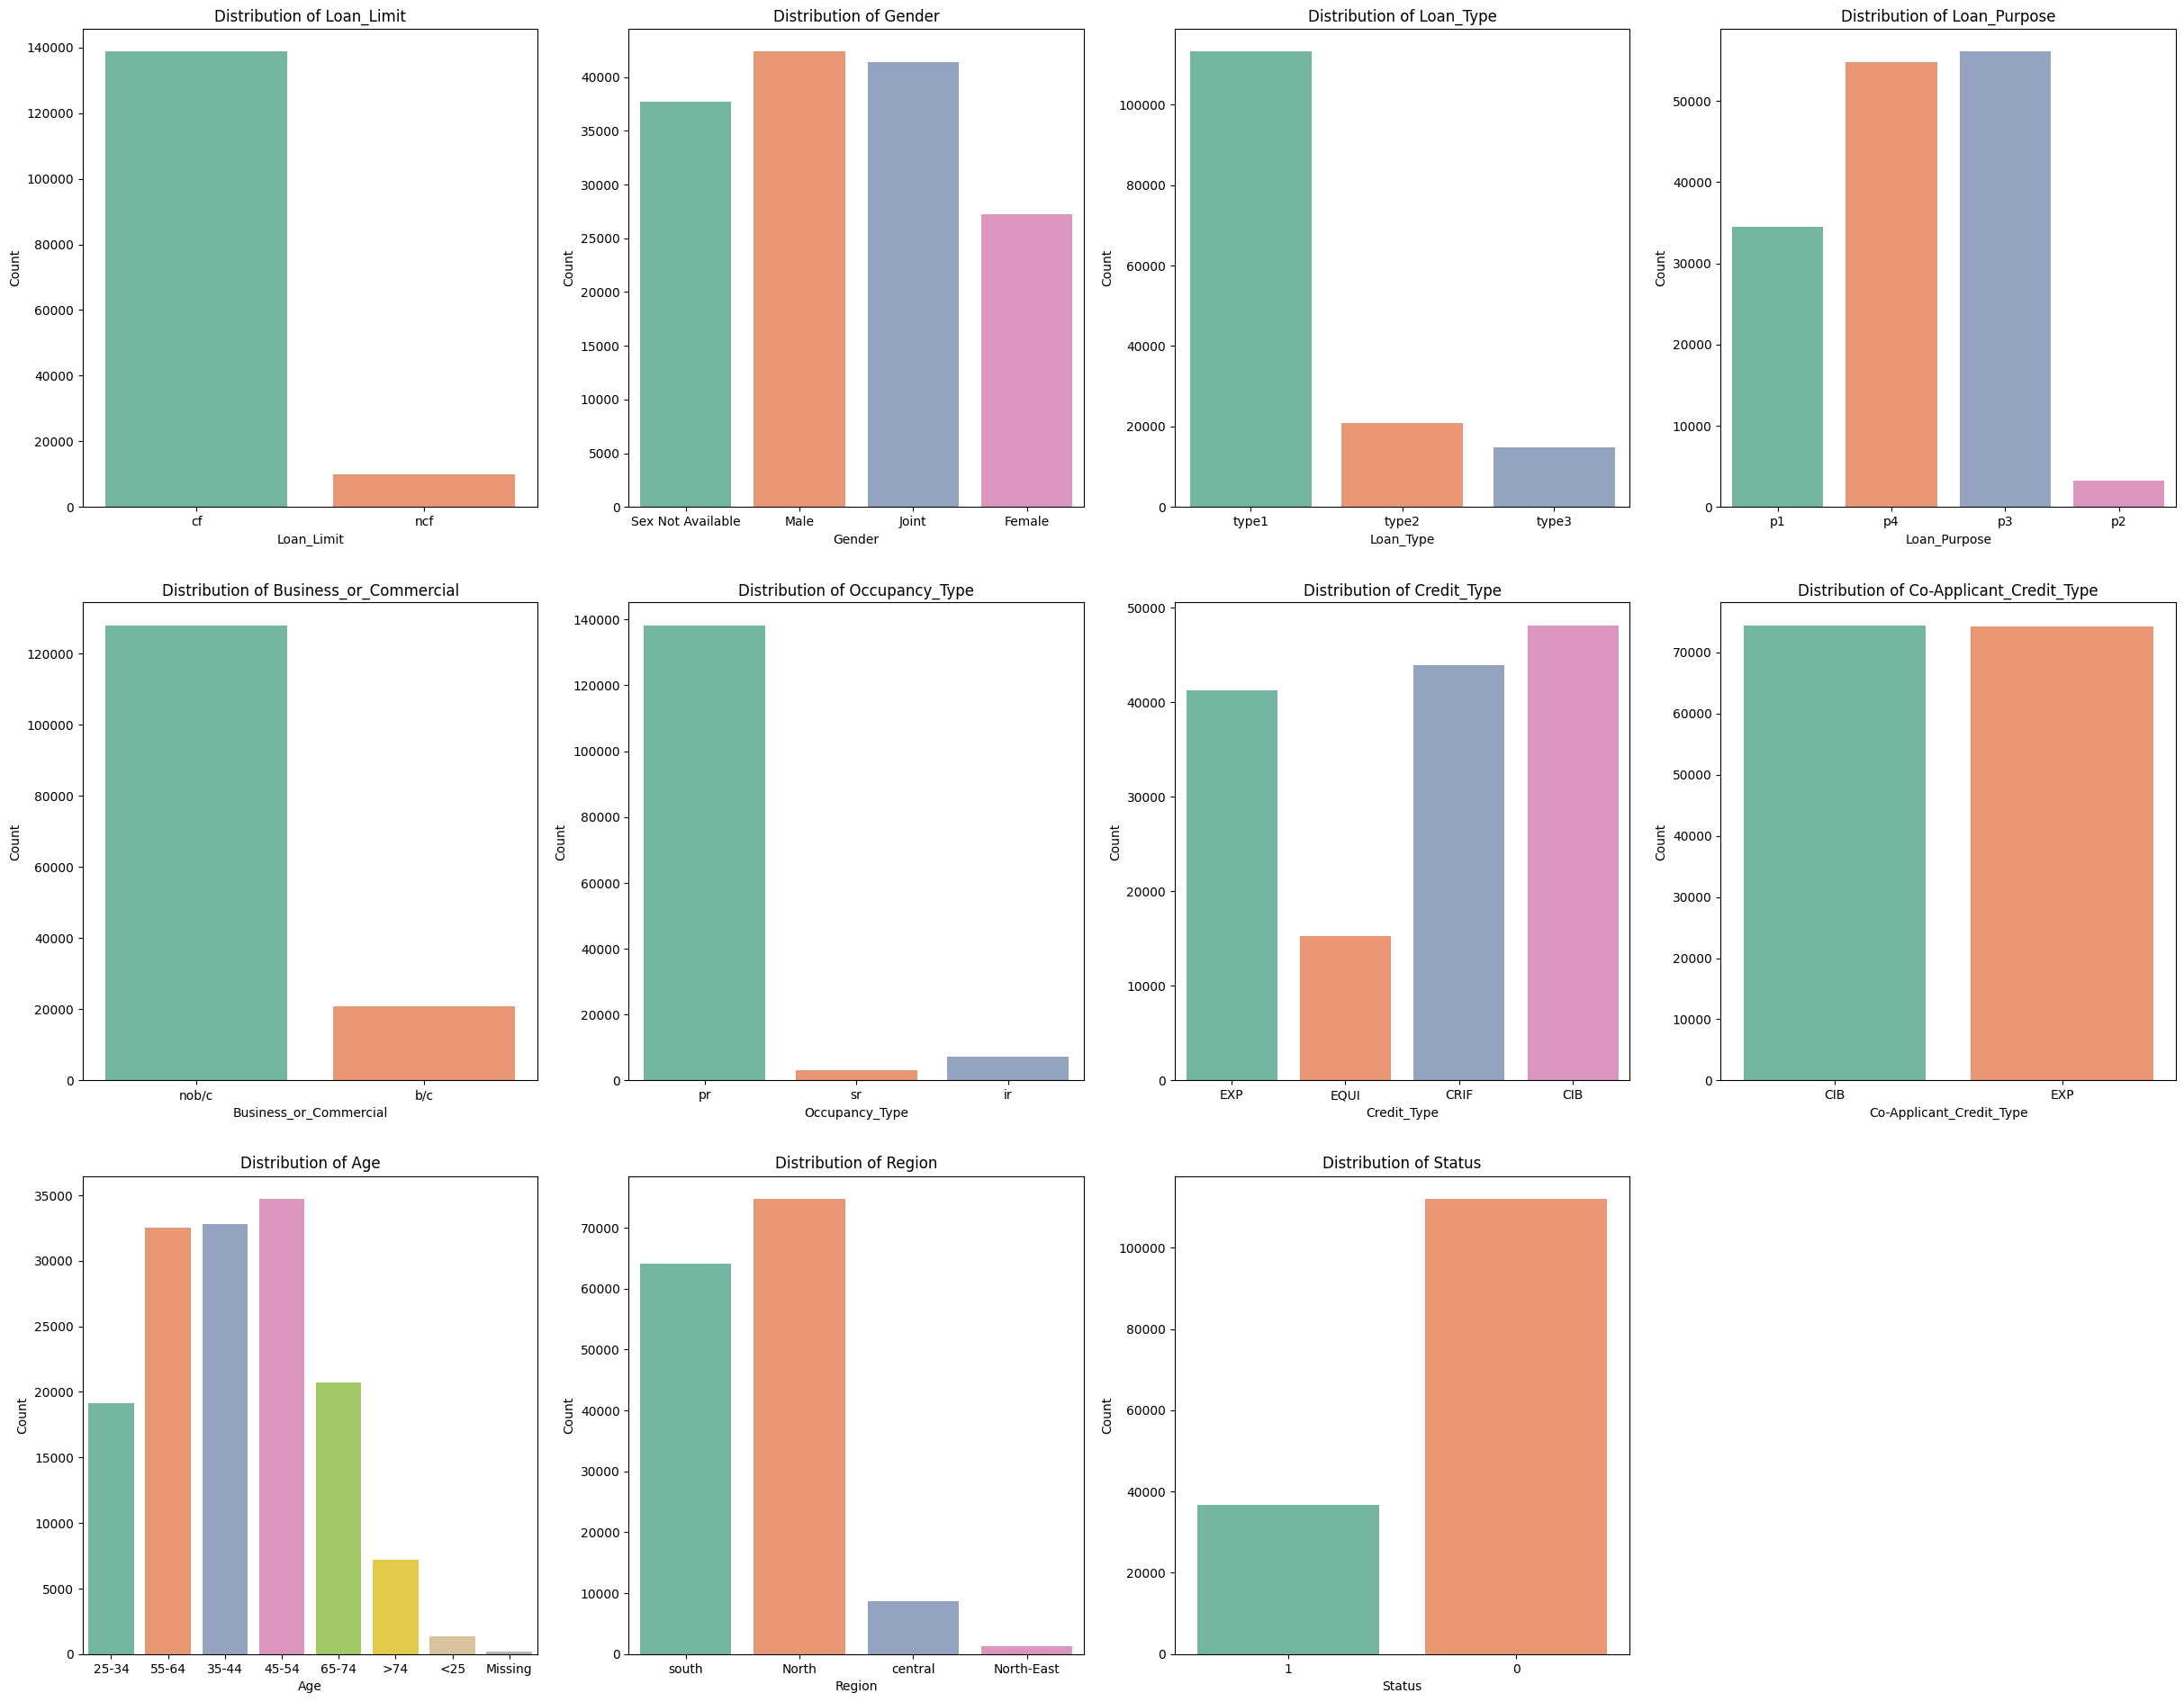

In [52]:
col = data.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(30, 40))

for i,c in enumerate(col,1):
  plt.subplot(5,4,i)
  sns.countplot(data = data, x = c, palette='Set2')
  plt.title(f'Distribution of {c}')
  plt.xlabel(c)
  plt.ylabel('Count')
plt.show()



*   Loan_Limit: The majority of loans have a fixed (cf) loan limit, with only a small portion being variable (ncf).

* Gender: Gender data shows a significant number of applicants as "Sex Not Available," while male and joint applications are most common among specified genders.

* Loan_Type: Type1 loans are the most prevalent, followed by Type2, with Type3 being the least common.

* Loan_Purpose: Loan purposes are primarily split between p3 and p4, with p2 being the least common.

* Business_or_Commercial: Most loans are for personal (non-commercial) use, with fewer loans designated for commercial purposes.

* Occupancy_Type: The majority of loans are for primary residences (pr), with few for secondary or investment properties.

* Credit_Type: Credit data is spread across the four types, with CIB and EQUI being slightly more common.

* Co-Applicant_Credit_Type: The distribution shows an almost equal split between the two credit types available for co-applicants.
* Age: Applicants are mostly within the 35-54 age range, with very few under 25 or over 74.
* Region: Loans are most frequently distributed in the South, with Central and North-East regions being less common.
* Status (Defaulter): Most loan applicants are non-defaulters (0), indicating a lower rate of defaults in the dataset.

In [53]:
data['Income'].max()

578580.0

In [54]:
data['Loan_Amount_Bin'] = pd.cut(data['Loan_Amount'], bins=[10000, 100000, 500000, 1000000, 2000000, data['Loan_Amount'].max()],
                                 labels=['10K-100K', '100K-500K', '500K-1M', '1M-2M', '2M-3.6M'])
data['Rate_of_Interest_Bin'] = pd.cut(data['Rate_of_Interest'], bins=[0, 2, 4, 6, 8],
                                      labels=['0-2', '2-4', '4-6', '6-8'])
data['Upfront_Charges_Bin'] = pd.cut(data['Upfront_Charges'], bins=[0, 5000, 15000, 30000, data['Upfront_Charges'].max()],
                                     labels=['0-5K', '5K-15K', '15K-30K', '30K-60K'])
data['Property_Value_Bin'] = pd.cut(data['Property_Value'], bins=[0, 100000, 500000, 1000000, 5000000, data['Property_Value'].max()],
                                    labels=['0-100K', '100K-500K', '500K-1M', '1M-5M', '5M-17M'])
data['Income_Bin'] = pd.cut(data['Income'], bins=[0, 5000, 10000, 50000, 100000, data['Income'].max()],
                            labels=['0-5K', '5K-10K', '10K-50K', '50K-100K', '100K-600K'])
data['Credit_Score_Bin'] = pd.cut(data['Credit_Score'], bins=[300, 580, 670, 740, 800, data['Credit_Score'].max()],
                                  labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])
data['LTV_Bin'] = pd.cut(data['LTV'], bins=[0, 50, 80, 90, 100, data['LTV'].max()],
                         labels=['Low Risk', 'Moderate Risk', 'High Risk', 'Very High Risk', 'Extremely High Risk'])


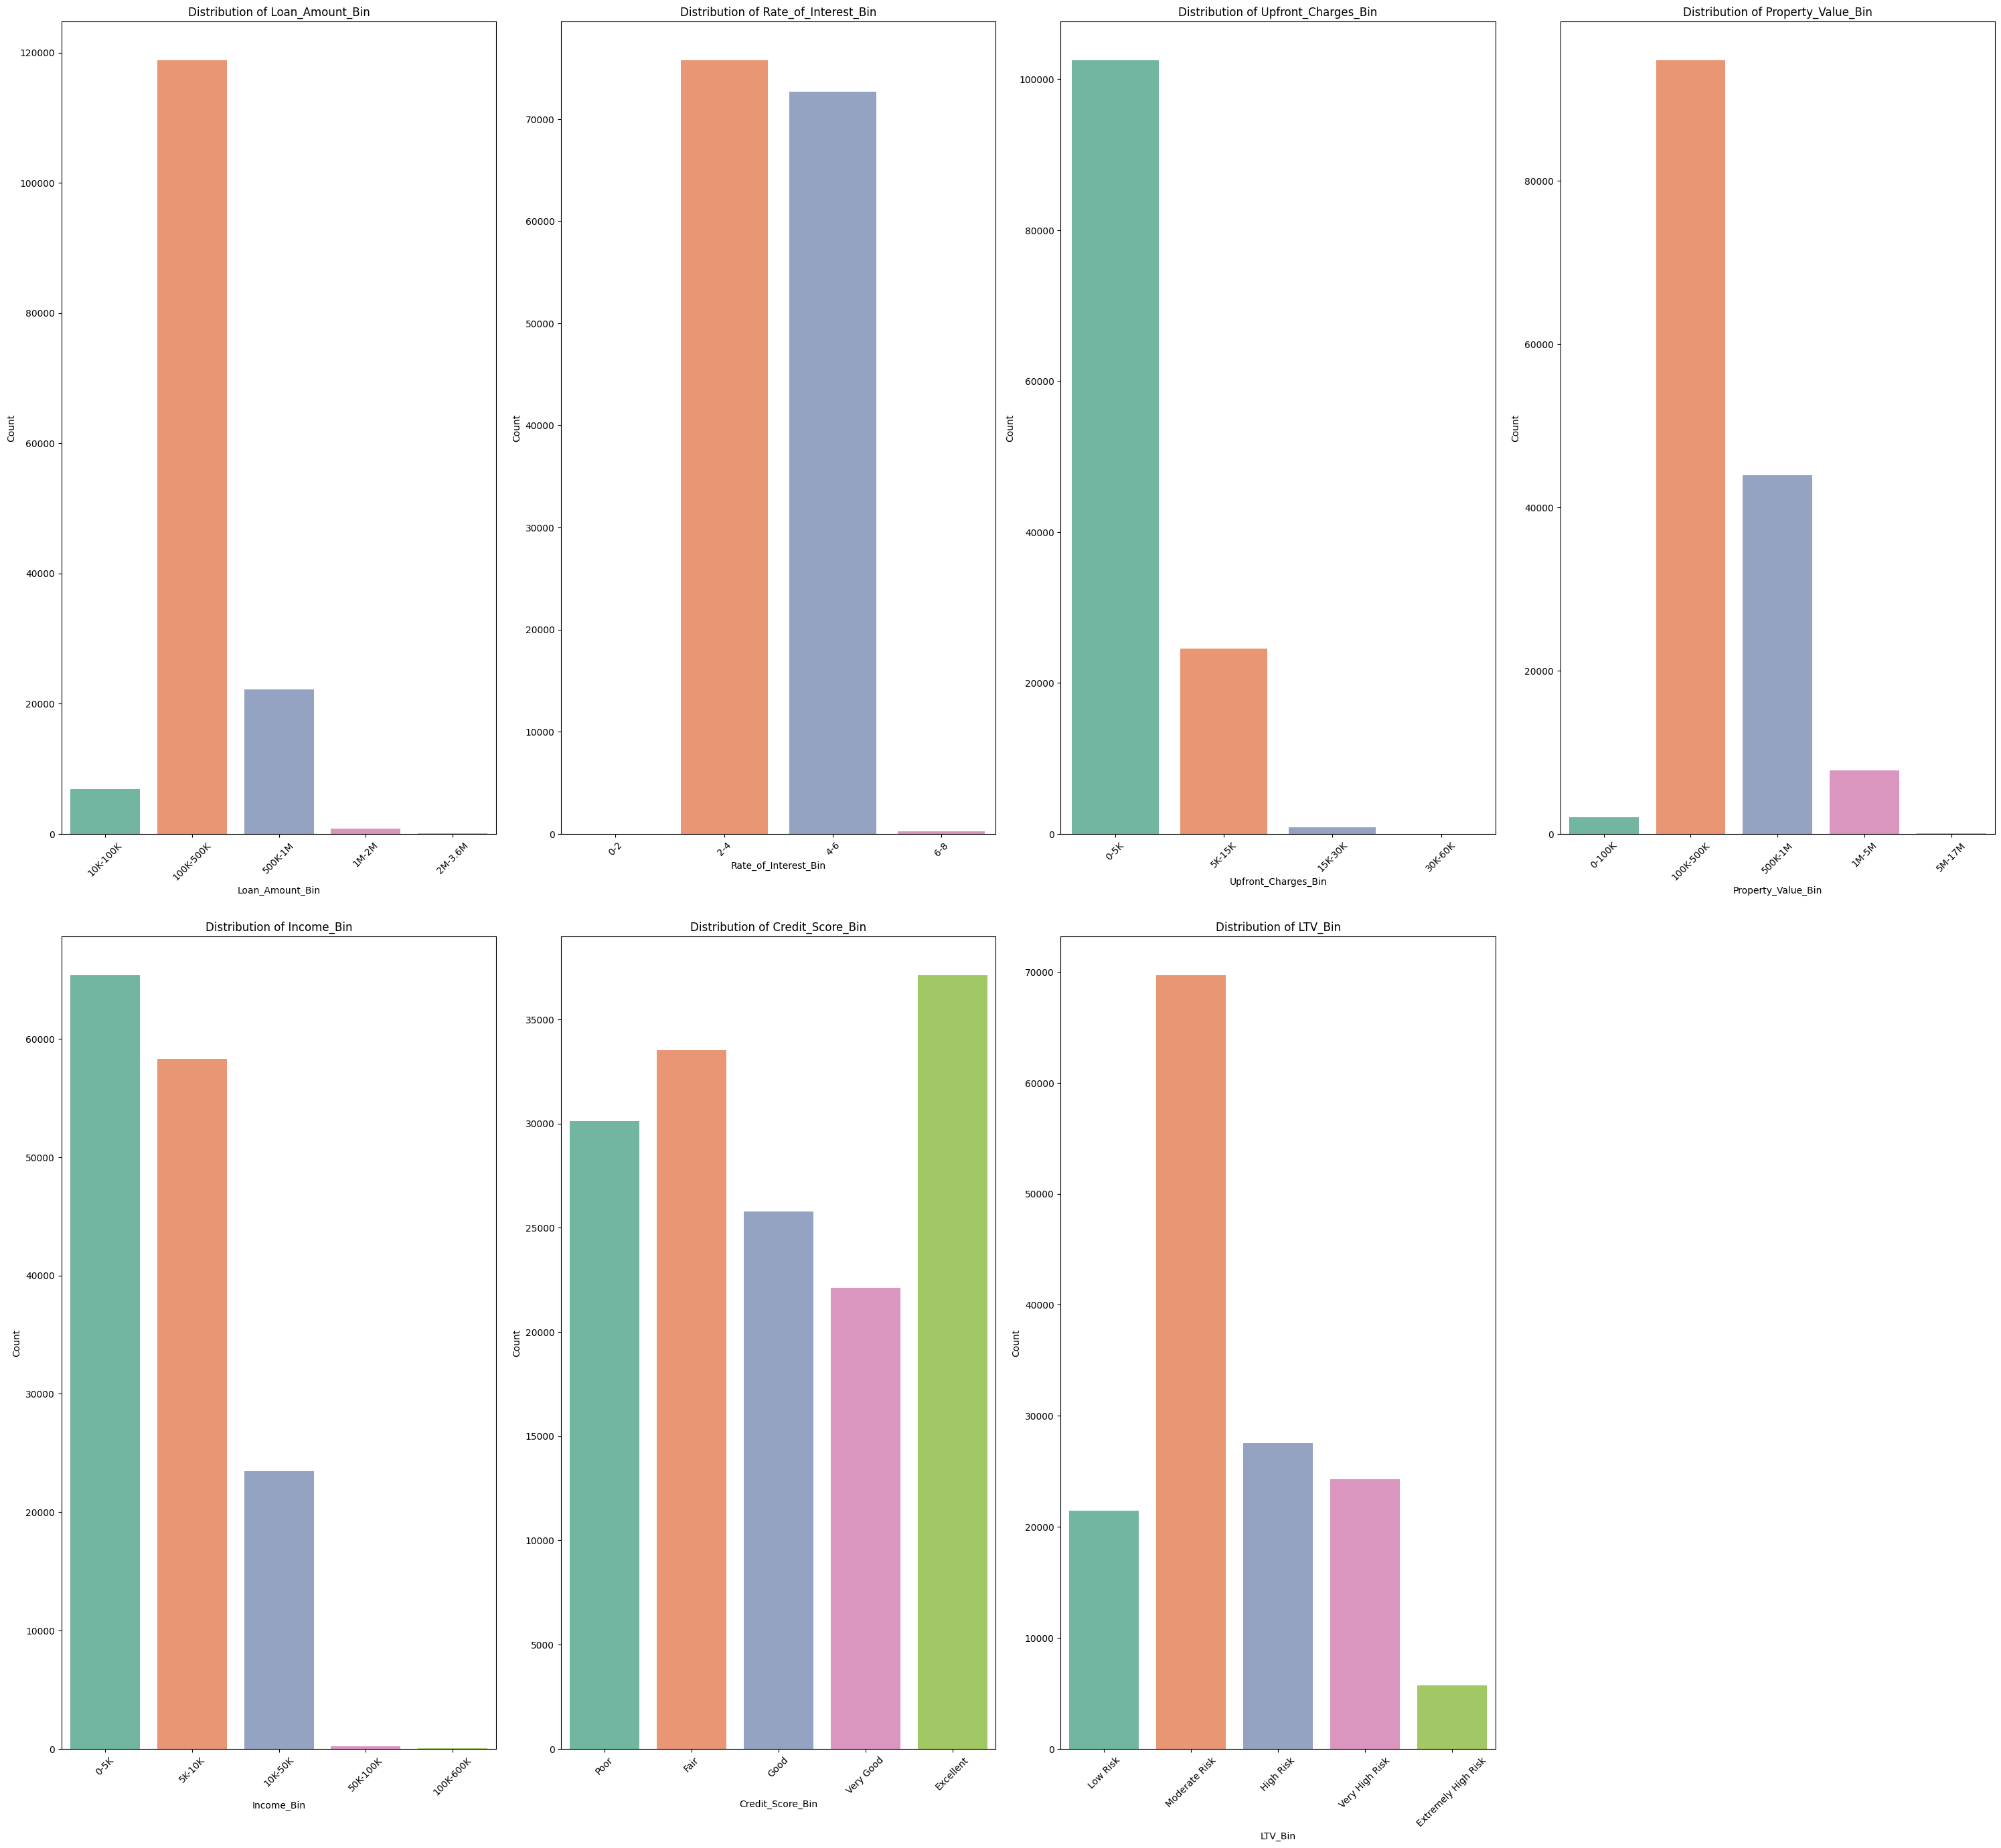

In [55]:
plt.figure(figsize=(30, 40))
binned_columns = ['Loan_Amount_Bin', 'Rate_of_Interest_Bin', 'Upfront_Charges_Bin', 'Property_Value_Bin',
                  'Income_Bin', 'Credit_Score_Bin', 'LTV_Bin']
for i, col in enumerate(binned_columns, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data=data, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* Loan_Amount_Bin: The majority of loans fall in the "100K-500K" range, indicating a preference for medium-sized loans.

* Rate_of_Interest_Bin: Interest rates are primarily concentrated in the "2-4%" and "4-6%" ranges, reflecting moderate borrowing costs for most applicants.

* Upfront_Charges_Bin: The "0-5K" range dominates upfront charges, suggesting that low upfront costs are common and may be appealing to borrowers.

* Property_Value_Bin: Most properties fall within the "100K-500K" range, pointing to a demand for moderately valued properties among applicants.

* Income_Bin: Income distribution is highest in the "0-5K" and "5K-10K range, highlighting that the primary customer base has mid-level income.

* Credit_Score_Bin: Credit scores show a balanced distribution, with significant portions in the "Fair," "Good," and "Very Good" categories and "Excellent" category being the highest, indicating varied creditworthiness among borrowers.

* LTV_Bin: "Moderate Risk" is the largest segment in LTV, showing that most loans have relatively safe loan-to-value ratios, with controlled risk levels.



# EDA

> Credit Score and Loan Default Rate

In [56]:
H0 = ('There is no significant difference in the average credit score between defaulters and non-defaulters.')
H1 = ('Defaulters have a significantly lower average credit score than non-defaulters.')


In [57]:
defaulters = data[data['Status'] == '1']['Credit_Score']
non_defaulters = data[data['Status'] == '0']['Credit_Score']

In [58]:
from scipy.stats import shapiro, levene
shapiro_def = shapiro(defaulters)
shapiro_non_def = shapiro(non_defaulters)
levene_test = levene(defaulters, non_defaulters)
print("Shapiro Defaulters:", shapiro_def)
print("Shapiro Non-Defaulters:", shapiro_non_def)
print("Levene Test:", levene_test)

Shapiro Defaulters: ShapiroResult(statistic=0.9532517623938502, pvalue=1.204962052227061e-72)
Shapiro Non-Defaulters: ShapiroResult(statistic=0.9551134783379776, pvalue=1.2938597334220118e-93)
Levene Test: LeveneResult(statistic=7.556065158408943, pvalue=0.005981565324572037)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 36639.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 112031.
  res = hypotest_fun_out(*samples, **kwds)


In [59]:
# Levene Test failed
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(defaulters, non_defaulters, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)
if p_value > 0.05:
  print(H0)
else:
  print(H1)

t-statistic: 1.5382651698677738
p-value: 0.12398889772248435
There is no significant difference in the average credit score between defaulters and non-defaulters.


> Loan Type and Default Rate

In [60]:
H0 = 'Loan type has no impact on default rate.'
H1 = 'Default rates differ significantly among loan types.'

In [61]:
contingency_table = pd.crosstab(data['Loan_Type'], data['Status'])
print(contingency_table)

Status         0      1
Loan_Type              
type1      87398  25775
type2      13590   7172
type3      11043   3692


In [62]:
from scipy.stats import chi2_contingency
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
if p_value < 0.05:
  print(H1)
else:
  print(H0)

Chi-square statistic: 1309.9581425319489
p-value: 3.5172528245408e-285
Default rates differ significantly among loan types.


> Loan Amount and Default Likelihood

In [63]:
H0 = 'There is no significant difference in loan amounts between defaulters and non-defaulters.'
H1 = 'Defaulters have a significantly higher average loan amount than non-defaulters.'

In [64]:
defaulters_loan_amt = data[data['Status'] == '1']['Loan_Amount']
non_defaulters_loan_amt = data[data['Status'] == '0']['Loan_Amount']

In [65]:
shapiro_def = shapiro(defaulters_loan_amt)
shapiro_non_def = shapiro(non_defaulters_loan_amt)
levene_test = levene(defaulters_loan_amt, non_defaulters_loan_amt)
print("Shapiro Defaulters:", shapiro_def)
print("Shapiro Non-Defaulters:", shapiro_non_def)
print("Levene Test:", levene_test)

Shapiro Defaulters: ShapiroResult(statistic=0.838215001513644, pvalue=5.143606343116195e-102)
Shapiro Non-Defaulters: ShapiroResult(statistic=0.9344461870092244, pvalue=2.4309759412313773e-103)
Levene Test: LeveneResult(statistic=174.68249635601452, pvalue=7.397128401376198e-40)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 36639.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 112031.
  res = hypotest_fun_out(*samples, **kwds)


In [66]:
t_stat, p_value = ttest_ind(defaulters_loan_amt, non_defaulters_loan_amt, equal_var=False)
if p_value > 0.05:
  print(H0)
else:
  print(H1)

Defaulters have a significantly higher average loan amount than non-defaulters.


#Bivariant Analyst

> Categorical vs. Categorical

In [67]:
  col = ['Loan_Limit', 'Gender', 'Loan_Type', 'Loan_Purpose', 'Business_or_Commercial', 'Occupancy_Type', 'Credit_Type', 'Co-Applicant_Credit_Type', 'Age', 'Region']
  for i in col:
    print(f'{i} Column')
    print('-'*20)
    ct = pd.crosstab(data[i],data['Status'])
    print(ct)
    chi_stat,pval,dof,expected = chi2_contingency(ct)
    print(f'chi_stat: {chi_stat}, pval : {pval}')
    print('='*40)

Loan_Limit Column
--------------------
Status           0      1
Loan_Limit               
cf          105367  33325
ncf           6664   3314
chi_stat: 422.3643530286387, pval : 7.461399035455983e-94
Gender Column
--------------------
Status                 0      1
Gender                         
Female             20418   6848
Joint              33466   7933
Male               31255  11091
Sex Not Available  26892  10767
chi_stat: 1043.6008495787444, pval : 6.260048330360408e-226
Loan_Type Column
--------------------
Status         0      1
Loan_Type              
type1      87398  25775
type2      13590   7172
type3      11043   3692
chi_stat: 1309.9581425319489, pval : 3.5172528245408e-285
Loan_Purpose Column
--------------------
Status            0      1
Loan_Purpose              
p1            25594   8935
p2             2191   1083
p3            42037  14031
p4            42209  12590
chi_stat: 240.27555900080722, pval : 8.296912096696388e-52
Business_or_Commercial Column
----

In [68]:
col1 = ['Loan_Purpose', 'Loan_Type', 'Region', 'Business_or_Commercial','Occupancy_Type', 'Gender', 'Age']

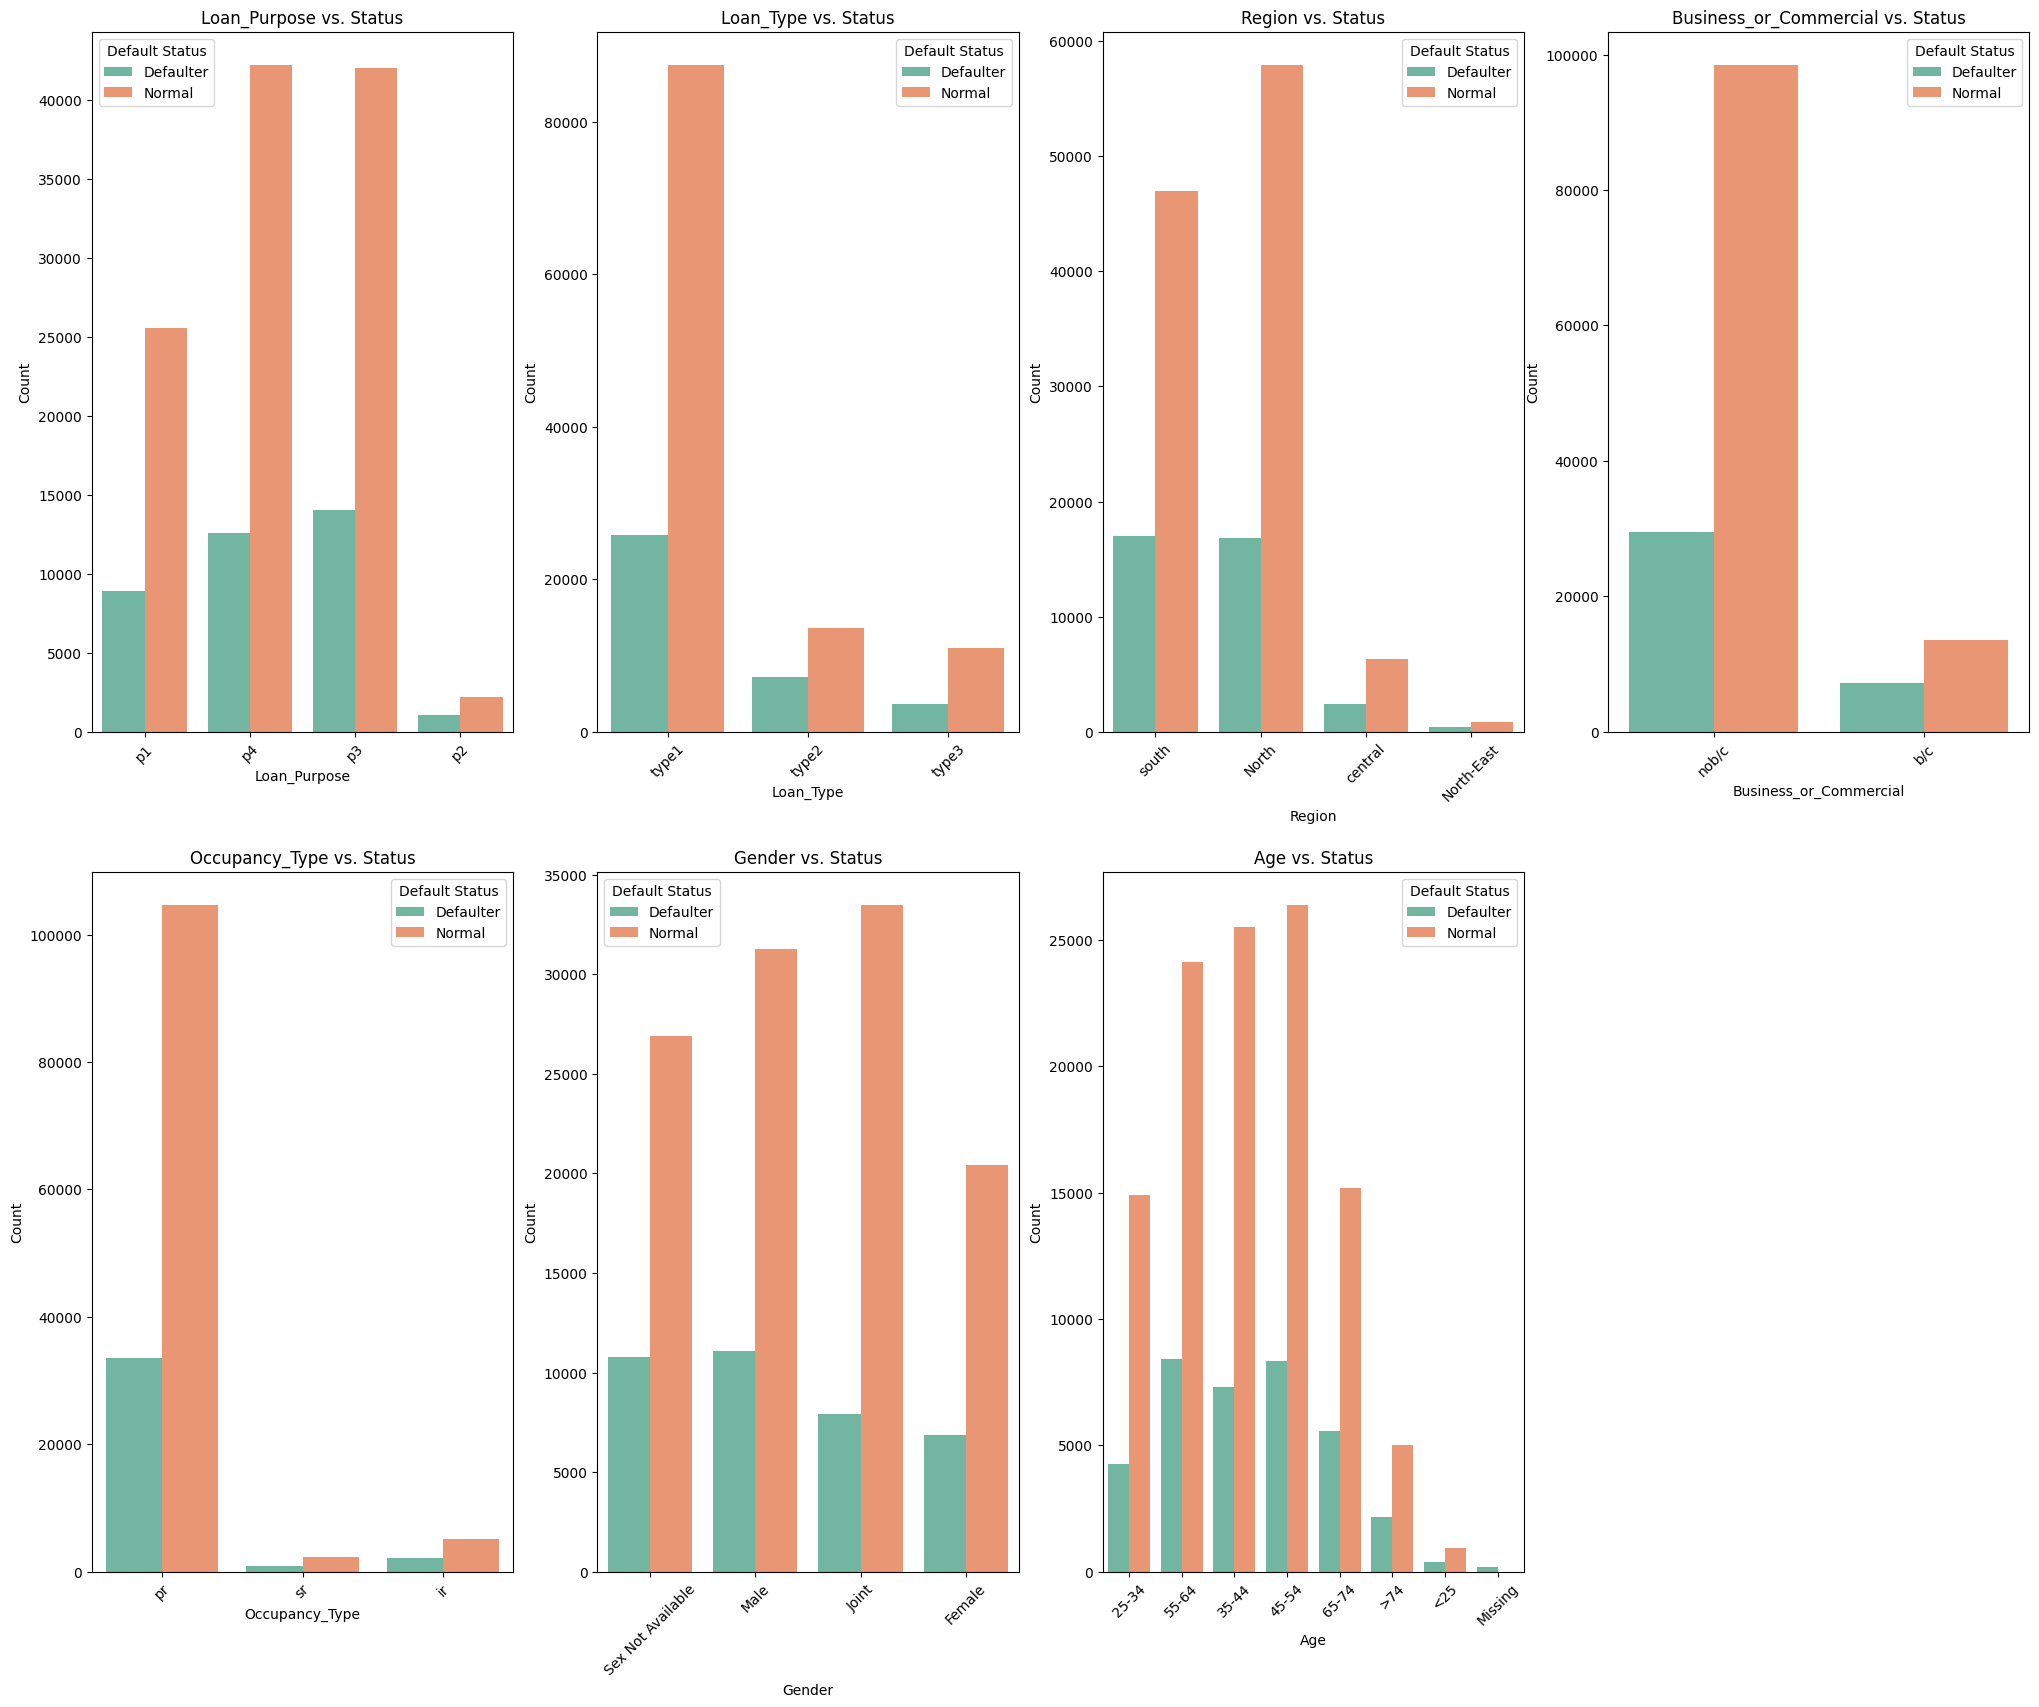

In [69]:
plt.figure(figsize = (25,20))
for i,col in enumerate(col1,1):
  plt.subplot(2,4,i)
  sns.countplot(data = data, x = col, hue = 'Status', palette = 'Set2')
  plt.title(f'{col} vs. Status')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.legend(title="Default Status", labels=["Defaulter","Normal"])
  plt.xticks(rotation=45)
plt.show()

* Loan_Purpose:

The proportion of defaulters varies significantly across loan purposes, with p2 having the highest default rate (33.08%) and p4 having the lowest (22.97%). This suggests that lenders should consider the loan purpose when assessing creditworthiness.

* Loan_Type:

The proportion of defaulters also varies across loan types, with type2 having the highest default rate (34.54%) and type1 having the lowest (22.77%). This indicates that lenders should consider the loan type when evaluating credit risk.

* Region:

The proportion of defaulters varies across regions, with the North-East region having the highest default rate (30.45%) and the North region having the lowest (22.51%). This suggests that lenders should consider regional factors when assessing creditworthiness.

* Business_or_Commercial:

The proportion of defaulters is significantly higher for business/commercial loans (34.54%) compared to non-business/commercial loans (23.04%). This indicates that lenders should consider the loan purpose and borrower type when evaluating credit risk.

* Occupancy_Type:

The proportion of defaulters varies across Occupancy type, with IR(Investment Residence) having highest default rate (29.9%) and PR(Primary Residence) being the lowest (24.3%).

* Borrower Gender:

>Male Borrowers Have the Highest Default Rate: Male borrowers have the highest proportion of defaulters, with 26.19% of male borrowers defaulting on their loans.

>Female Borrowers Have a Lower Default Rate: Female borrowers have a lower proportion of defaulters, with 25.12% of female borrowers defaulting on their loans.

>Joint Borrowers Have the Lowest Default Rate: Joint borrowers have the lowest proportion of defaulters, with 19.16% of joint borrowers defaulting on their loans.

* Borrower Age:

Borrowers in the 74+ age group exhibit a significantly higher likelihood of default, potentially attributed to a lack of financial stability, and furthermore, the proportion of default rates tends to increase with age, highlighting the need for targeted risk management strategies to mitigate default risk among older borrowers.



In [70]:
proportion_data = {}

# Loop through each categorical variable
for var in col1:
    # Group by the variable and calculate total borrowers and defaulters
    summary = data.groupby(var)['Status'].agg(
        total_borrowers='count',   # Total borrowers
        defaulters='sum'          # Defaulters (where Status = 1)
    ).reset_index()

    summary['defaulters'] = summary['defaulters'].apply(lambda x: x.count('1'))
    # Calculate the proportion of defaulters
    summary['proportion_defaulters'] = summary['defaulters'] / summary['total_borrowers']

    # Store the result in the dictionary
    proportion_data[var] = summary

# Print the results for each categorical variable
for var, summary in proportion_data.items():
    print(f"Proportion of Defaulters by {var}:")
    print(summary)
    print("\n")

Proportion of Defaulters by Loan_Purpose:
  Loan_Purpose  total_borrowers  defaulters  proportion_defaulters
0           p1            34529        8935               0.258768
1           p2             3274        1083               0.330788
2           p3            56068       14031               0.250250
3           p4            54799       12590               0.229749


Proportion of Defaulters by Loan_Type:
  Loan_Type  total_borrowers  defaulters  proportion_defaulters
0     type1           113173       25775               0.227749
1     type2            20762        7172               0.345439
2     type3            14735        3692               0.250560


Proportion of Defaulters by Region:
       Region  total_borrowers  defaulters  proportion_defaulters
0       North            74722       16821               0.225114
1  North-East             1235         376               0.304453
2     central             8697        2395               0.275382
3       south           

 > Categorical vs. Numerical

In [71]:
numerical_vars = ['Loan_Amount', 'Rate_of_Interest', 'Upfront_Charges',
                  'Property_Value', 'Income', 'Credit_Score', 'LTV']

In [72]:
def clip_outliers(data, var):
    lower_bound = data[var].quantile(0.05)
    upper_bound = data[var].quantile(0.95)
    data[var] = data[var].clip(lower=lower_bound, upper=upper_bound)
    return data

for var in numerical_vars:
    data = clip_outliers(data, var)

In [73]:
data['Income'].max()

15060.0

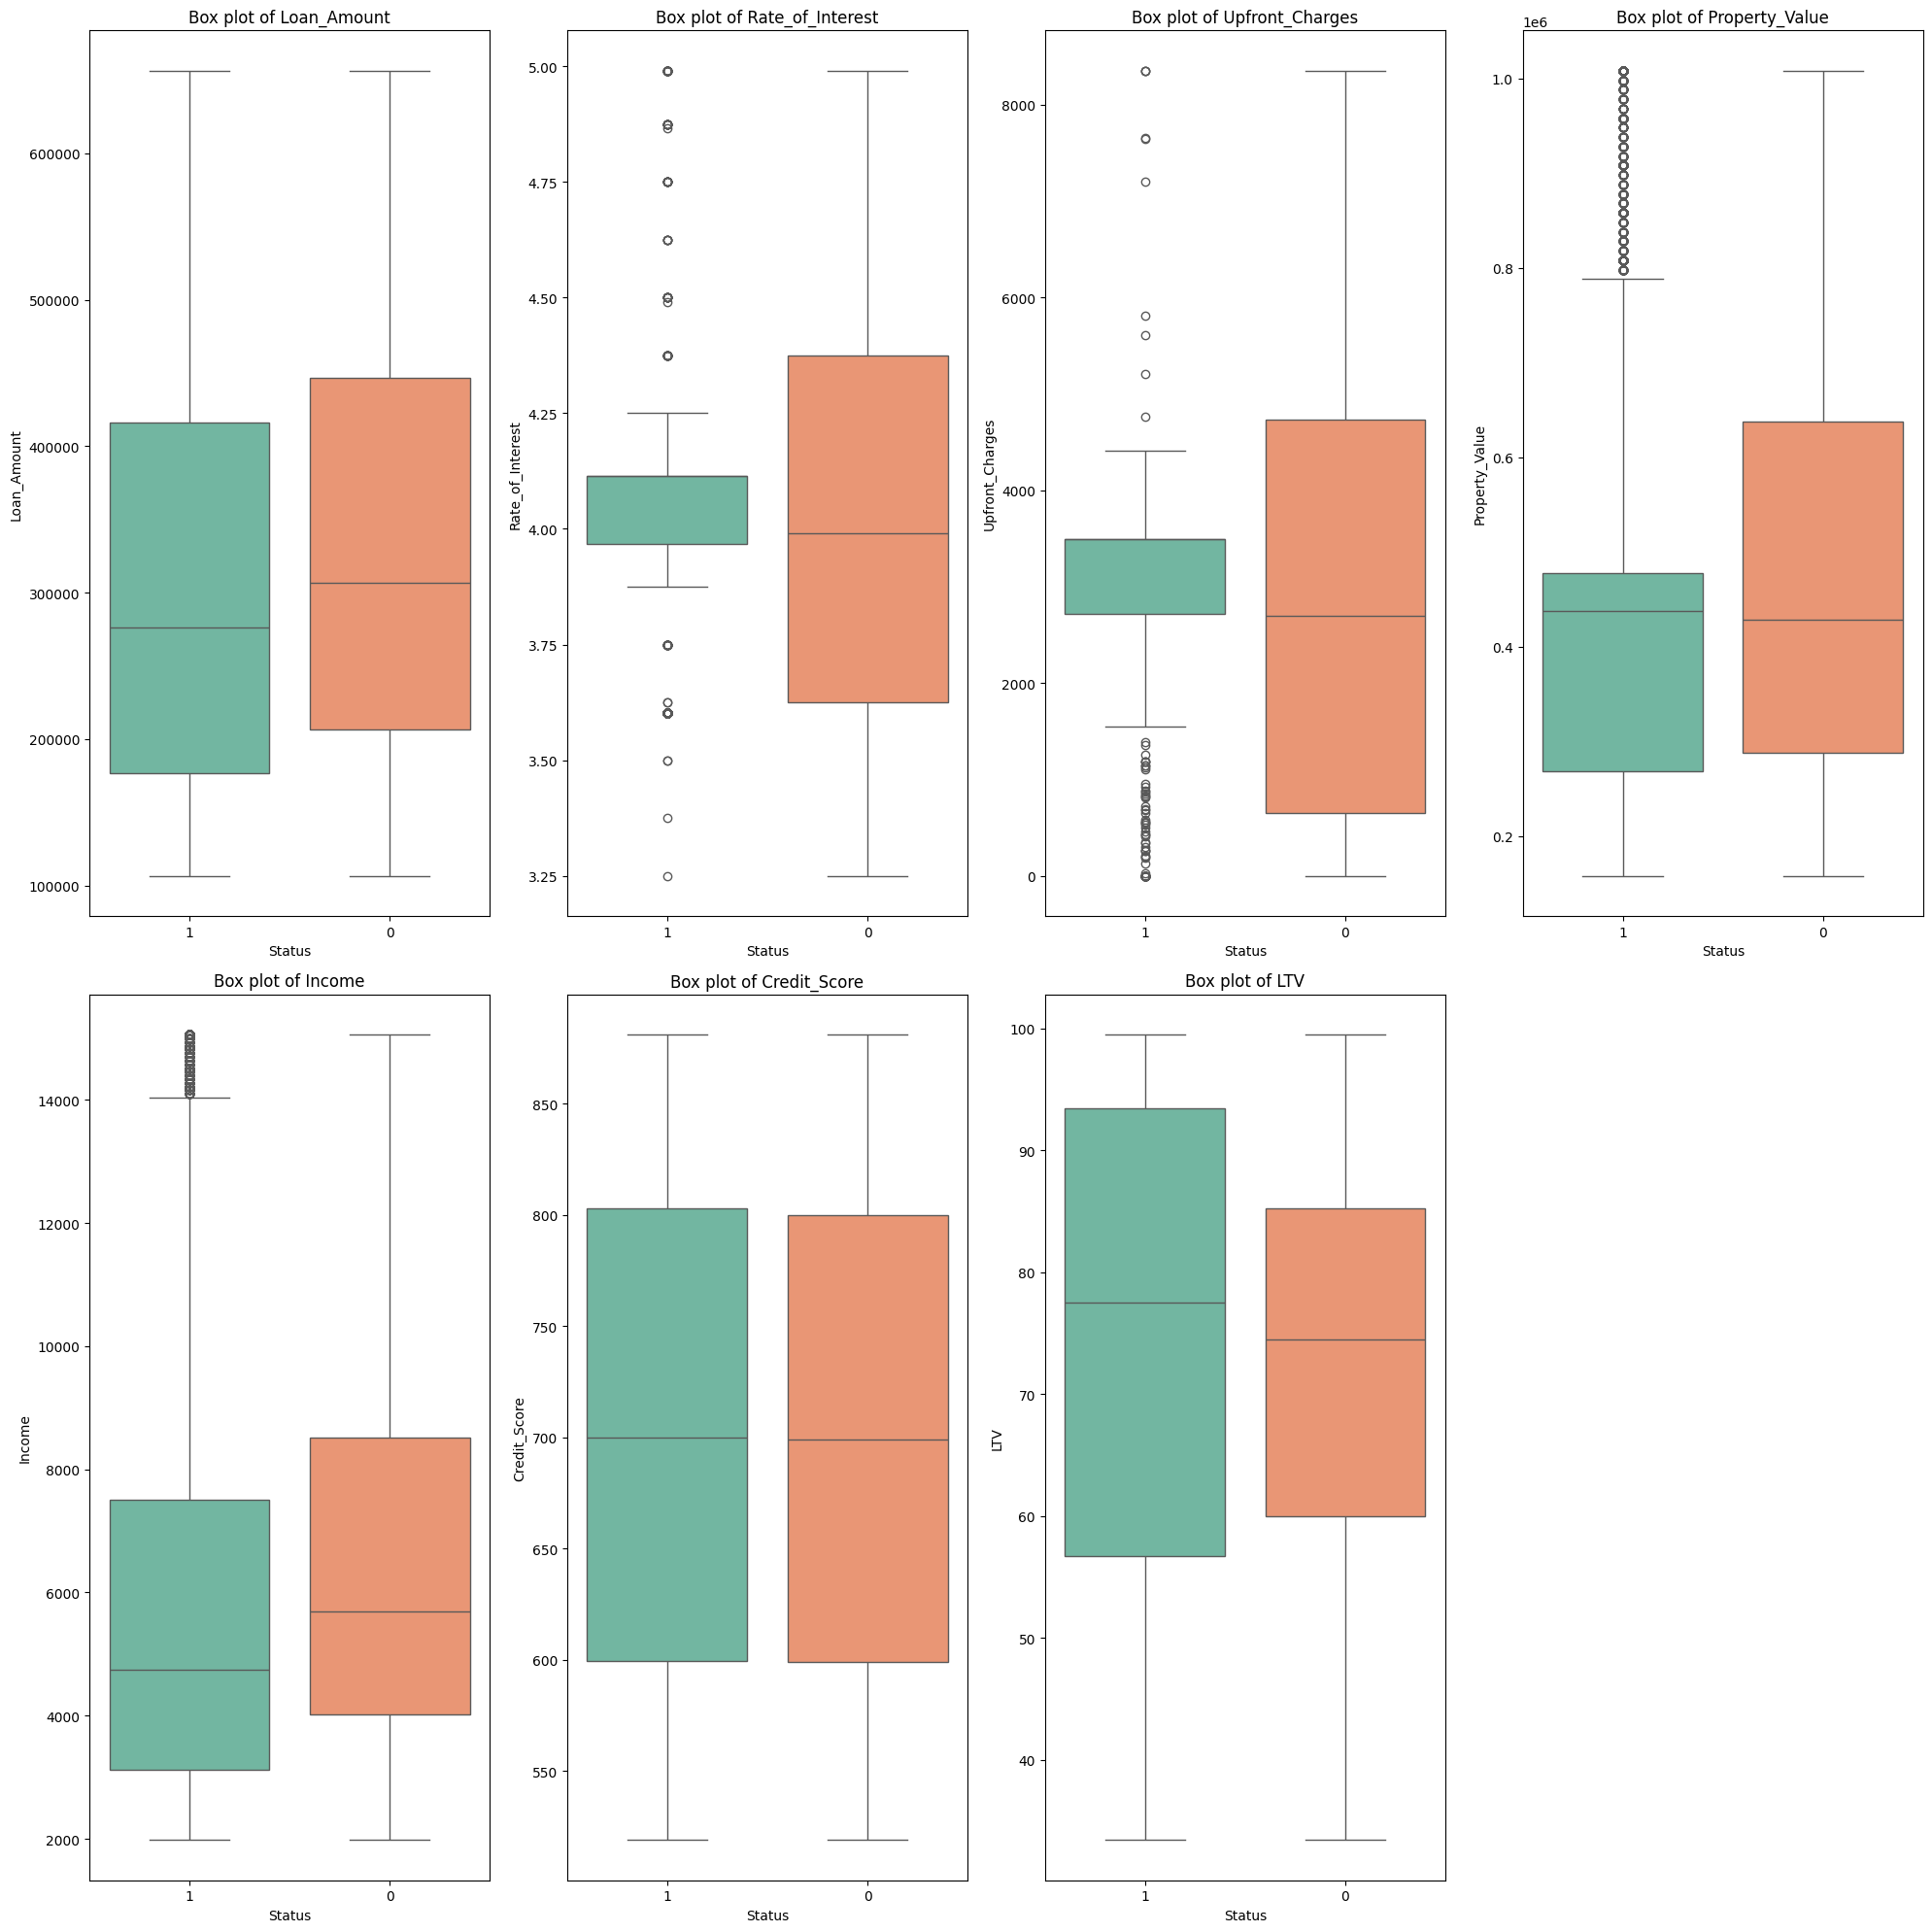

In [74]:
plt.figure(figsize=(20, 20))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=data,x = 'Status',y=var, palette='Set2')
    #plt.xlabel('Status (0 = Non-Defaulter, 1 = Defaulter)')
    plt.title(f'Box plot of {var}')
plt.tight_layout()
plt.show()

# Insights

Defaulters are associated with lower property values, income, and upfront charges, combined with higher LTV and interest rates. These patterns suggest that financial stability and stronger collateral are key to reducing default risk.

In [75]:
data.groupby('Status')['Loan_Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
0,112031.0,330746.503200,156972.795494,106500.0,206500.0,306500.0,446500.0,656500.0
1,36639.0,308940.841726,161885.741075,106500.0,176500.0,276500.0,416500.0,656500.0


In [76]:
for i in numerical_vars:
  print(f'{i} column description')
  print(data.groupby('Status')[i].describe())
  print('-'*50)

Loan_Amount column description
           count           mean            std       min       25%       50%  \
Status                                                                         
0       112031.0  330746.503200  156972.795494  106500.0  206500.0  306500.0   
1        36639.0  308940.841726  161885.741075  106500.0  176500.0  276500.0   

             75%       max  
Status                      
0       446500.0  656500.0  
1       416500.0  656500.0  
--------------------------------------------------
Rate_of_Interest column description
           count      mean       std   min       25%       50%       75%   max
Status                                                                        
0       112031.0  4.043900  0.502097  3.25  3.625000  3.990000  4.375000  4.99
1        36639.0  4.035517  0.159953  3.25  3.968137  4.113557  4.113557  4.99
--------------------------------------------------
Upfront_Charges column description
           count         mean          std 

In [77]:
numerical_vars = ['Loan_Amount', 'Rate_of_Interest', 'Upfront_Charges',
                  'Property_Value', 'Income', 'Credit_Score', 'LTV','Status']

,Status
Status,1.000000
LTV,0.025954
Upfront_Charges,0.015274
Credit_Score,0.003990
Rate_of_Interest,-0.008154
Loan_Amount,-0.059296
Income,-0.099328
Property_Value,-0.107055


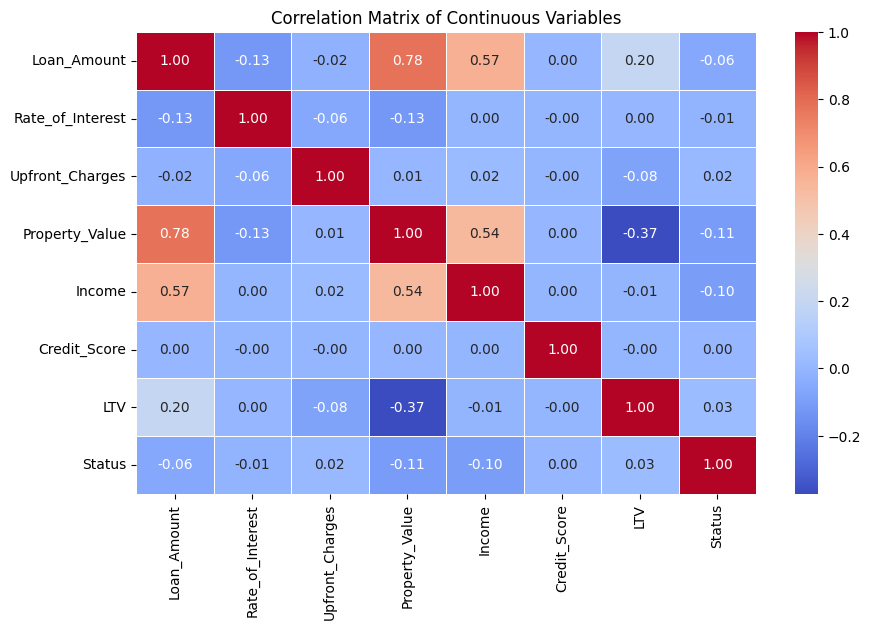

In [78]:
correlation_matrix = data[numerical_vars].corr()
correlation_status = correlation_matrix['Status'].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Continuous Variables')
correlation_status

* Status:

  Status has very weak correlation with all numerical variable in the dataset

* Relationship Between Predictors:

  Property_Value and Loan_Amount: Strong positive correlation, These indicate that larger loan generally associate with high property value

  Income and Loan_Amount: Moderate positive correlation, This indicate that higher income levels are associated with larger loan amounts.

  Property_Value and Income: Moderate positive correlation, Indicating higher property values often corresponds to borrowers with higher income

#Multivariant analysis

> Loan Character analysis

In [79]:
data['Status'] = pd.to_numeric(data['Status'], errors='coerce')

Business_or_Commercial       b/c     nob/c
Loan_Type Loan_Purpose                    
type1     p1                 NaN  0.243955
          p2                 NaN  0.307747
          p3                 NaN  0.222378
          p4                 NaN  0.217663
type2     p1            0.319183       NaN
          p2            0.468037       NaN
          p3            0.348176       NaN
          p4            0.357284       NaN
type3     p1                 NaN  0.277080
          p2                 NaN  0.888889
          p3                 NaN  0.301757
          p4                 NaN  0.187284


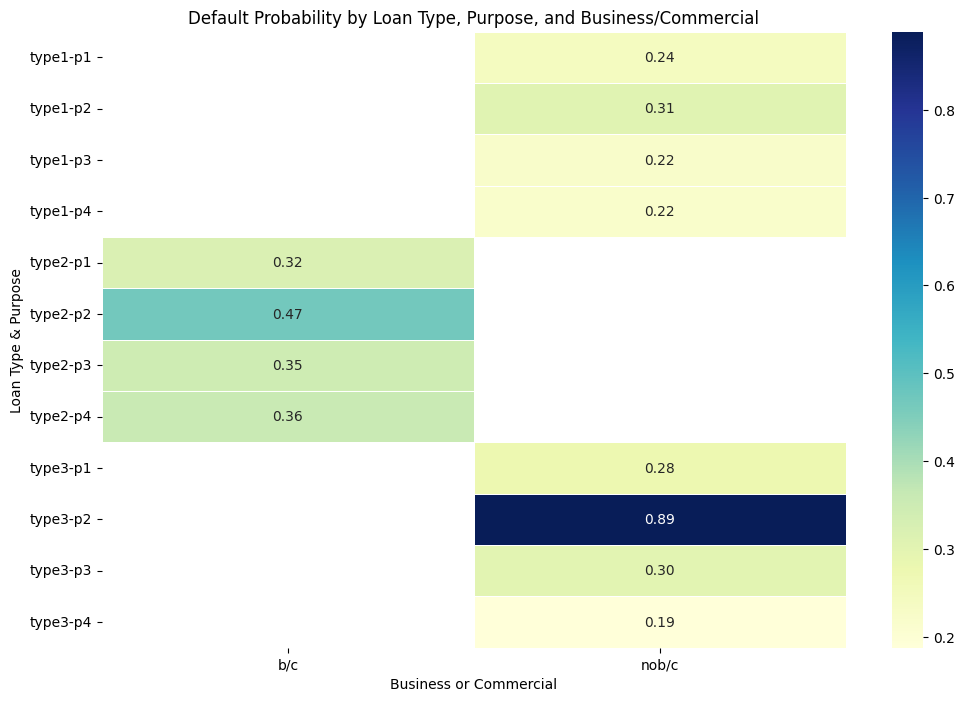

In [80]:
grouped_data = data.groupby(['Loan_Type', 'Loan_Purpose', 'Business_or_Commercial'])['Status'].mean().reset_index()

grouped_data.rename(columns={'Status': 'Default_Probability'}, inplace=True)

# Pivoting the data for visualization
pivot_table = grouped_data.pivot_table(
    values='Default_Probability',
    index=['Loan_Type', 'Loan_Purpose'],
    columns='Business_or_Commercial'
)

# Display pivot table
print(pivot_table)

# Visualization: Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Default Probability by Loan Type, Purpose, and Business/Commercial')
plt.xlabel('Business or Commercial')
plt.ylabel('Loan Type & Purpose')
plt.show()

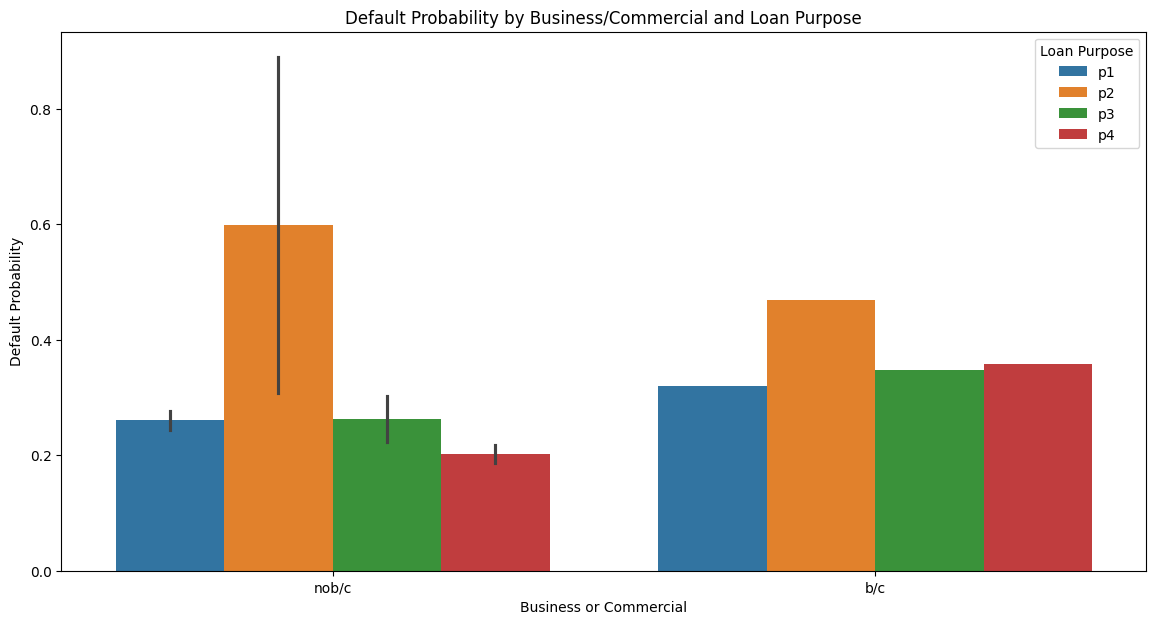

In [81]:
# Additional visualization: Bar plot
plt.figure(figsize=(14, 7))
sns.barplot(
    data=grouped_data,
    x='Business_or_Commercial',
    y='Default_Probability',
    hue='Loan_Purpose',
    dodge=True
)
plt.title('Default Probability by Business/Commercial and Loan Purpose')
plt.xlabel('Business or Commercial')
plt.ylabel('Default Probability')
plt.legend(title='Loan Purpose')
plt.show()

#Insights:

* Risky Loan Purpose (p2 Remains the Riskiest):

  * Across both analyses, p2 consistently exhibits the highest default probabilities, irrespective of loan type or whether it is business or non-business.
  * This makes p2 loans a key area of focus for mitigating risk:
    * Analyze why borrowers under p2 have higher default rates. Is it related to income, collateral, or external factors?

* Business Loans Are Generally Riskier:

  * Loans under business/commercial (b/c) purposes (e.g., type2) consistently show higher default probabilities compared to non-business loans.
  * This reflects the volatile nature of businesses, which may face fluctuating revenues, market risks, or poor management practices.

* Loan Types Impact Risk:

  * Loan type significantly influences default risk:
    * Type1 loans (non-business) are relatively safer, making them suitable for personal lending portfolios.
    * Type2 loans (business) are inherently riskier and need focused risk management strategies.
    * Type3 loans show mixed risk—p2 being extremely risky while p4 is the safest.

* Consistency in Risk Hierarchy:
  * Across all categories, p2 > p3 > p1 > p4 appears to be the general risk hierarchy, regardless of loan type or purpose. This hierarchy can guide risk-based pricing and underwriting strategies.

> Loan_Type, Loan_Purpose, Status

Loan_Purpose         p1         p2         p3         p4
Loan_Type                                               
type1         24.395529  30.774673  22.237789  21.766251
type2         31.918267  46.803653  34.817578  35.728411
type3         27.708006  88.888889  30.175669  18.728438


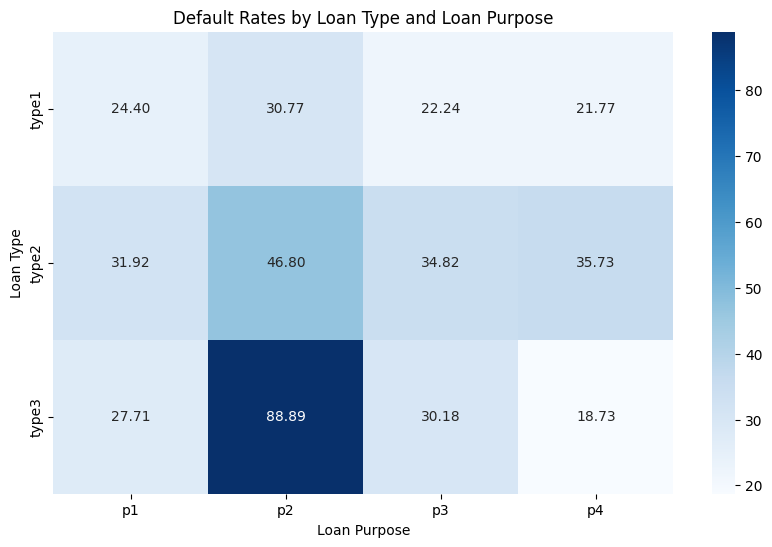

In [82]:
# Grouping data by Loan_Type and Loan_Purpose to calculate default rate
default_rate = data.groupby(['Loan_Type', 'Loan_Purpose'])['Status'].mean() * 100

# Reshaping the data for better visualization
default_rate_pivot = default_rate.unstack()

# Display the result
print(default_rate_pivot)

# Optional: Visualize the default rates using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(default_rate_pivot, annot=True, fmt=".2f", cmap="Blues")
plt.title("Default Rates by Loan Type and Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Loan Type")
plt.show()


#key Observations

* Focus on Loan Purpose as a Critical Factor:

  * The data consistently shows that loan purpose (p1–p4) is a strong predictor of default risk. This should be factored into credit scoring models to better assess risk.
* Address the Alarming Risk of p2:

  * With p2 showing default rates as high as 88.88% for type3 and 46.80% for type2, this loan purpose requires immediate intervention:
    * Conduct borrower profiling to understand demographic or financial patterns driving defaults.
    * Revise approval criteria for p2 loans or limit exposure to this purpose.

* Reevaluate Type2 Loans:

  * Type2 loans consistently have higher default rates across all purposes, indicating that business loans need stricter controls:
    * Introduce additional risk mitigation measures, such as co-signers, higher collateral requirements, or targeted financial support programs for businesses.

* Leverage Safer Options:

  * Loans with p1 and p4 purposes and loans under type1 or type3 (except p2) are safer bets. Use these insights to diversify and de-risk the portfolio.



---



> Credit and Income Analysis

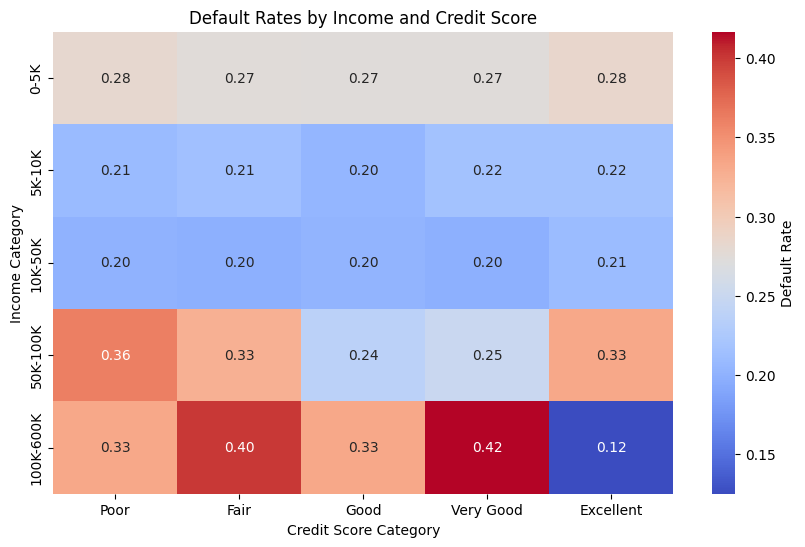

In [83]:
interaction_analysis = data.groupby(['Income_Bin', 'Credit_Score_Bin'])['Status'].mean().unstack()

# Visualize the interaction using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(interaction_analysis, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Default Rate'})
plt.title('Default Rates by Income and Credit Score')
plt.xlabel('Credit Score Category')
plt.ylabel('Income Category')
plt.show()

# Insights

* Income Category & Default Rate
  * Lower Income Tiers (0-50K) show relatively low default rates (~20-28%) across all credit score categories
  * Higher Income Tiers (50K-600K) exhibit a significant increase in default rates (up to 42%), particularly in the "Fair" and "Very Good" credit score categories.
* Credit Score & Default Rate
  * Applicants with "Fair" credit scores (580-669) have consistently higher default rates across all income levels, reaching up to 40%.
  * Interestingly, "Excellent" credit scores (740-850) exhibit lower default rates, especially in the 50K-100K and above income ranges
* Interaction Between Credit Score and Income
  * The "Very Good" credit score group (670-739) shows variability, with default rates spiking (42%) in the highest income category (100K-600K). This may suggest over-leveraging or overconfidence in their financial stability.
  * Conversely, lower income levels and "Poor" credit scores show default rates at or below 28%, implying that these groups might either take fewer loans or are more cautious.

> DTI

In [84]:
data['Debt_to_Income'] = data['Loan_Amount']/data['Income']

In [85]:
data['Debt_to_Income'].value_counts().reset_index()

,Debt_to_Income,count
0,53.787879,3286
1,43.592297,2226
2,63.888889,604
3,58.838384,543
4,32.304117,443
...,...,...
10750,33.529874,1
10751,16.861371,1
10752,35.921986,1
10753,22.768480,1


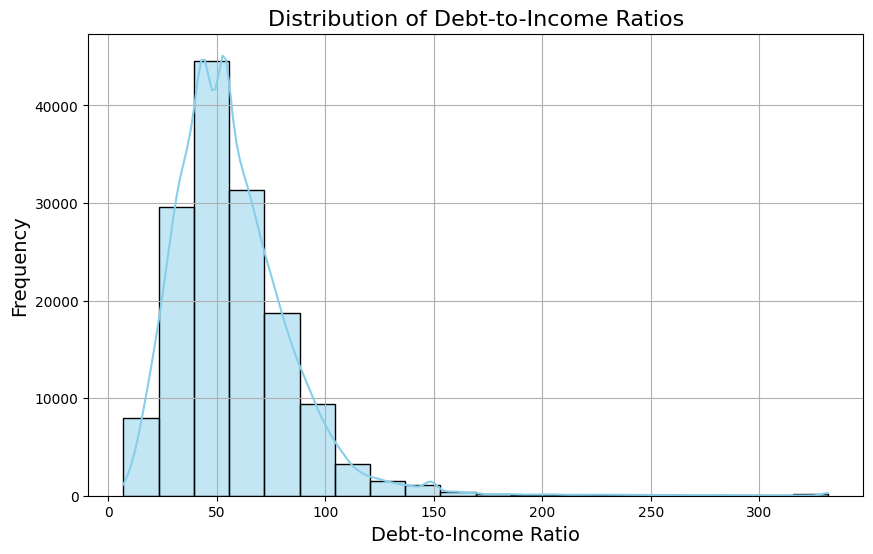

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Debt_to_Income'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Debt-to-Income Ratios', fontsize=16)
plt.xlabel('Debt-to-Income Ratio', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

* Concentration Around Lower DTI:
  The majority of borrowers have a DTI ratio concentrated between 40% to 60%, as indicated by the peak of the distribution.
  This suggests that most borrowers have a manageable debt burden relative to their income.

* Right-Skewed Distribution:
  The distribution is right-skewed, meaning there are fewer borrowers with extremely high DTI ratios (e.g., above 100%).
  Borrowers with higher DTI are less common, but they might represent a higher risk of default due to excessive debt relative to their income.

* Potential Default Risk Zone:
  Borrowers with DTIs above 80% or 100% are likely in a high-risk zone, as they allocate a large portion of their income to debt payments, leaving little for other expenses.
  These borrowers may struggle to meet repayment obligations, especially if their income fluctuates or additional expenses arise.

In [87]:
bin = [0,40,60,80,data['Debt_to_Income'].max()]
label = ['<40%', '40-60%', '60-80%', '>80%']
data['DTI_Category'] = pd.cut(data['Debt_to_Income'],bins=bin,labels=label,right= False)
default_rate_by_dti = data.groupby('DTI_Category')['Status'].mean().reset_index()

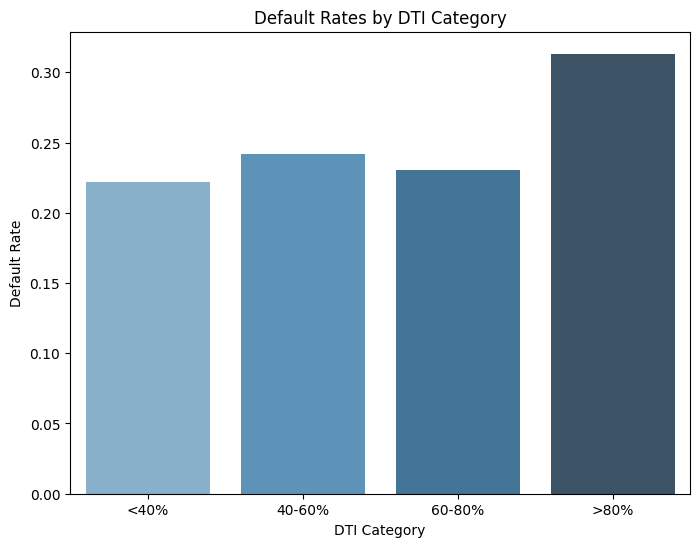

In [88]:
default_rate_by_dti = data.groupby('DTI_Category')['Status'].mean().reset_index()

# Visualize the results using a bar plot
plt.figure(figsize=(8,6))
sns.barplot(x='DTI_Category', y='Status', data=default_rate_by_dti, palette='Blues_d')

# Add title and labels
plt.title('Default Rates by DTI Category')
plt.xlabel('DTI Category')
plt.ylabel('Default Rate')

# Show the plot
plt.show()

The analysis suggests a clear positive correlation between DTI and default risk. As the DTI increases, the likelihood of default also rises, with borrowers in the highest DTI category (>80%) exhibiting a significantly higher default rate (33%).

#Key Insights:
* Lower DTI (<40%) borrowers are the least risky, with a default rate of 23%.
* Middle-range DTI (40-60% and 60-80%) borrowers have similar default rates (~24%) and are moderately risky.
* High DTI (>80%) borrowers have the highest risk of default (33%).



---



#Upfront Charges and LTV

In [89]:
upfront_median = data['Upfront_Charges'].median()
ltv_median = data['LTV'].median()

# Create segments based on Upfront Charges and LTV
data['Upfront_Category'] = np.where(data['Upfront_Charges'] <= upfront_median, 'Low', 'High')
data['LTV_Category'] = np.where(data['LTV'] > ltv_median, 'High', 'Low')

In [90]:
grouped = data.groupby(['Upfront_Category', 'LTV_Category', 'Loan_Purpose', 'Loan_Type'])['Status'].mean().reset_index()
grouped.rename(columns={'Status': 'Default_Rate'}, inplace=True)

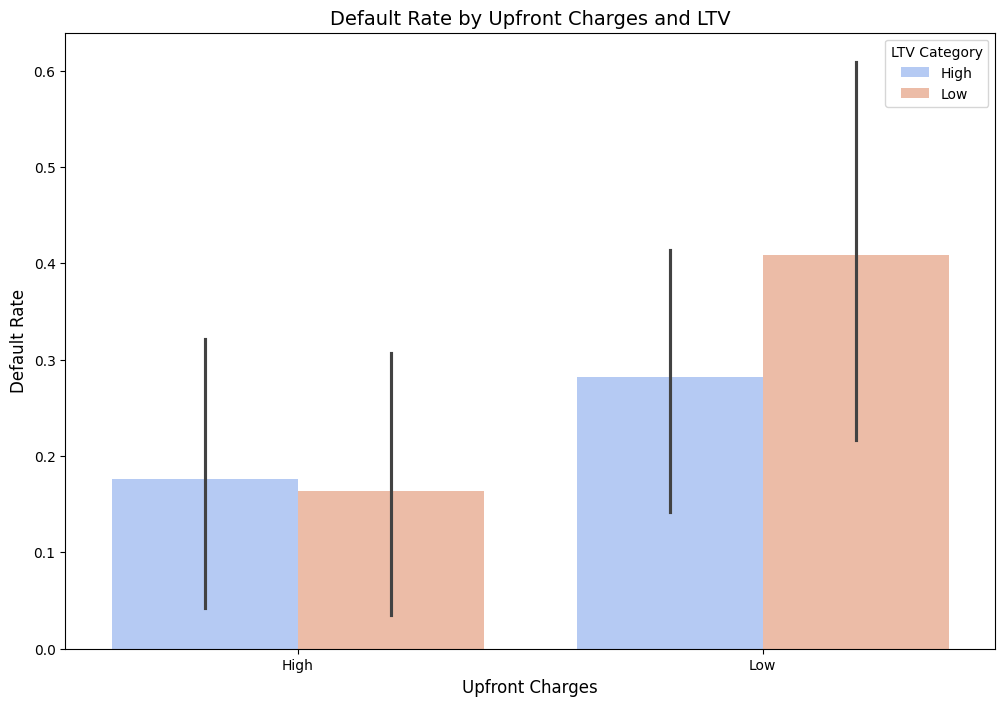

In [91]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=grouped,
    x='Upfront_Category',
    y='Default_Rate',
    hue='LTV_Category',
    palette='coolwarm'
)
plt.title('Default Rate by Upfront Charges and LTV', fontsize=14)
plt.xlabel('Upfront Charges', fontsize=12)
plt.ylabel('Default Rate', fontsize=12)
plt.legend(title='LTV Category')
plt.show()

#Insights

* High Upfront Charges Mitigate Risk:

  * Loans with high upfront charges have significantly lower default rates regardless of the LTV category.
  * This indicates that higher upfront charges act as a strong deterrent to defaults, potentially due to increased borrower commitment.

* Low Upfront Charges with Low LTV are High-Risk:

  * The combination of low upfront charges and low LTV exhibits the highest default rates.
  * Borrowers in this segment likely have reduced financial stake in the loan, increasing their likelihood of defaulting.

* Impact of LTV with Low Upfront Charges:

  * Low upfront charges with high LTV also show moderately high default rates, though not as severe as the low-LTV counterpart.
  * This suggests that while high LTV slightly offsets the risk, it does not fully compensate for low upfront payments.

* High LTV with High Upfront Charges is Stable:

  * Loans with high LTV and high upfront charges show the lowest default rates, highlighting that upfront payments are a stronger risk mitigator than LTV alone.



---



# Defaulter Segmentation

In [92]:
def_data = data[data['Status']==1]

segment = def_data.groupby(['Credit_Type','Region','Income','Age']).size().reset_index(name='Defaulter_Count')

In [93]:
overall_cnt = data.groupby(['Credit_Type','Region','Income','Age']).size().reset_index(name='Total_Count')
segment = pd.merge(segment,overall_cnt,on=['Credit_Type','Region','Income','Age'])

In [94]:
segment['Defaulter_Percentage'] = (segment['Defaulter_Count']/segment['Total_Count'])*100

In [95]:
segment =segment.sort_values(by='Defaulter_Percentage',ascending=False)
segment

,Credit_Type,Region,Income,Age,Defaulter_Count,Total_Count,Defaulter_Percentage
4599,EQUI,North,3840.0,55-64,12,12,100.000000
5342,EQUI,North,12120.0,45-54,4,4,100.000000
5352,EQUI,North,12240.0,65-74,2,2,100.000000
5351,EQUI,North,12240.0,55-64,1,1,100.000000
5350,EQUI,North,12240.0,45-54,5,5,100.000000
...,...,...,...,...,...,...,...
610,CIB,North,8460.0,35-44,1,36,2.777778
526,CIB,North,7380.0,45-54,1,37,2.702703
363,CIB,North,5520.0,35-44,1,39,2.564103
4122,CRIF,south,9000.0,35-44,1,41,2.439024


In [96]:
segment.groupby(['Region','Credit_Type'])['Defaulter_Percentage'].mean().reset_index()

,Region,Credit_Type,Defaulter_Percentage
0,North,CIB,18.546951
1,North,CRIF,20.075326
2,North,EQUI,100.000000
3,North,EXP,19.434650
4,North-East,CIB,78.125000
5,North-East,CRIF,78.490991
6,North-East,EQUI,100.000000
7,North-East,EXP,74.943503
8,central,CIB,47.301506
9,central,CRIF,44.844341


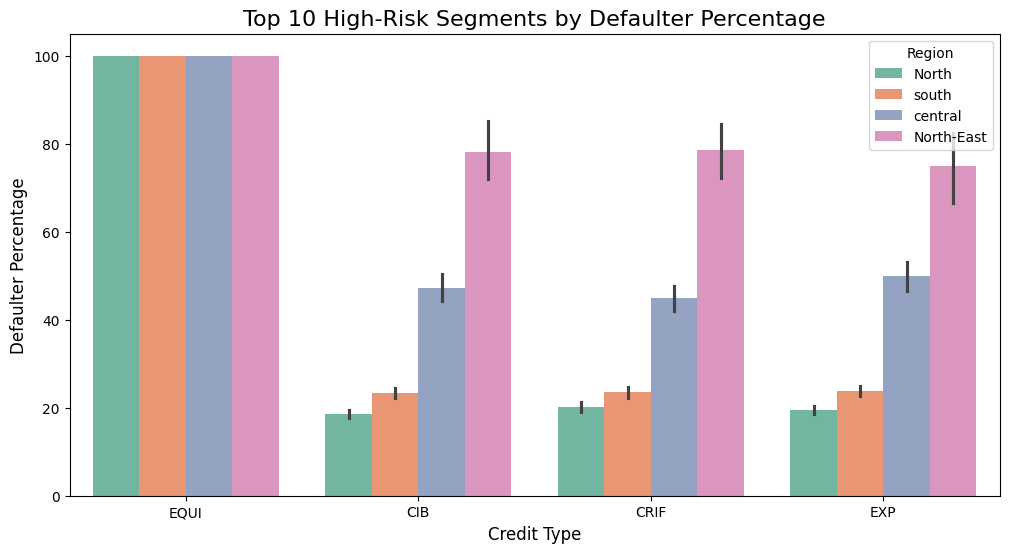

In [97]:
#top_segments = segment.sort_values(by='Defaulter_Percentage', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=segment,
    x='Credit_Type',
    y='Defaulter_Percentage',
    hue='Region',  # Optional to add another dimension
    palette='Set2'
)
plt.title('Top 10 High-Risk Segments by Defaulter Percentage', fontsize=16)
plt.xlabel('Credit Type', fontsize=12)
plt.ylabel('Defaulter Percentage', fontsize=12)
plt.legend(title='Region',loc = 'upper right')
plt.show()

N#Insights

* High Default Risk in Certain Regions and Credit Types
  * North-East and Central regions show significantly higher default rates compared to other regions:
    * North-East:
      * EQUI (100%)
      * CRIF (78.49%)
      * CIB (78.13%)
      * EXP (74.94%)
    * Central:
      * EQUI (100%)
      * Other credit types have default rates around 44%–50%.
*  North Region Has the Lowest Default Rates
  * The Nort region demonstrates a relatively low default rate for most credit types:
    * CIB (18.54%)
    * CRIF (20.07%)
    * EXP (19.43%)
    * However, EQUI is an outlier with a near 100% default rate.
* EQUI is the Most Risk-Prone Credit Type Across All Regions
  * 100% default rate for EQUI is consistent across all regions.
*  Regional Variations in Default Risk
  * North-East Region shows uniformly high default rates (~74%–100%) across all credit types, which indicates higher financial instability or risk-prone borrowers in this region.
  * South Region has moderately high default rates for most credit types (~23%), but EQUI stands out at 100%.
  * Central Region has mid-level default rates (~44%–50%) but spikes to 100% for EQUI.

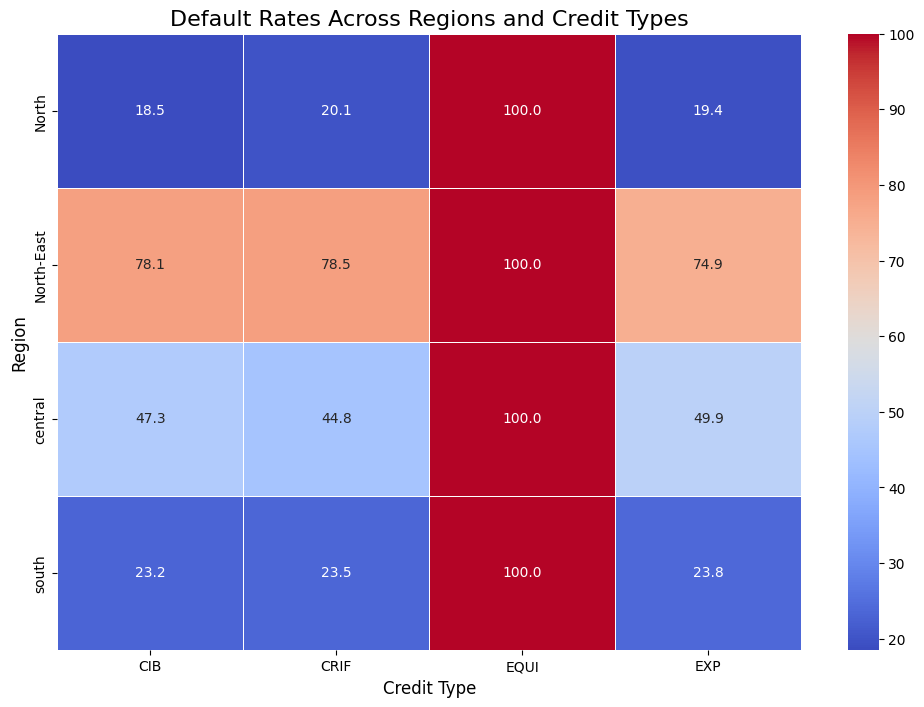

In [98]:
heatmap_data = segment.pivot_table(
    index='Region',
    columns='Credit_Type',
    values='Defaulter_Percentage',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5)
plt.title('Default Rates Across Regions and Credit Types', fontsize=16)
plt.xlabel('Credit Type', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.show()


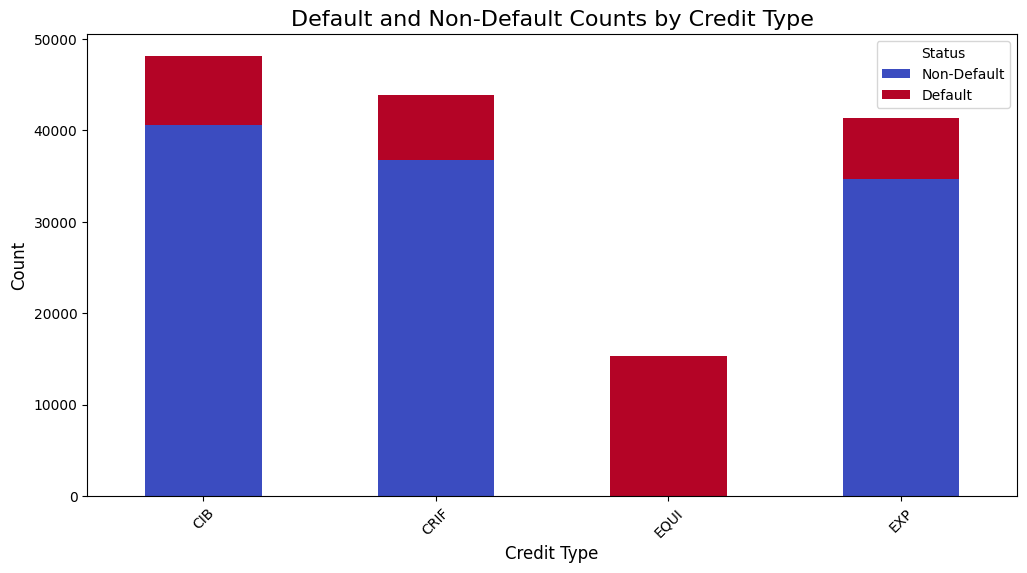

In [99]:
stacked_data = data.groupby(['Credit_Type', 'Status'])['Status'].count().unstack()

# Plot stacked bar chart
stacked_data.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='coolwarm'
)
plt.title('Default and Non-Default Counts by Credit Type', fontsize=16)
plt.xlabel('Credit Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Non-Default', 'Default'], title='Status')
plt.show()

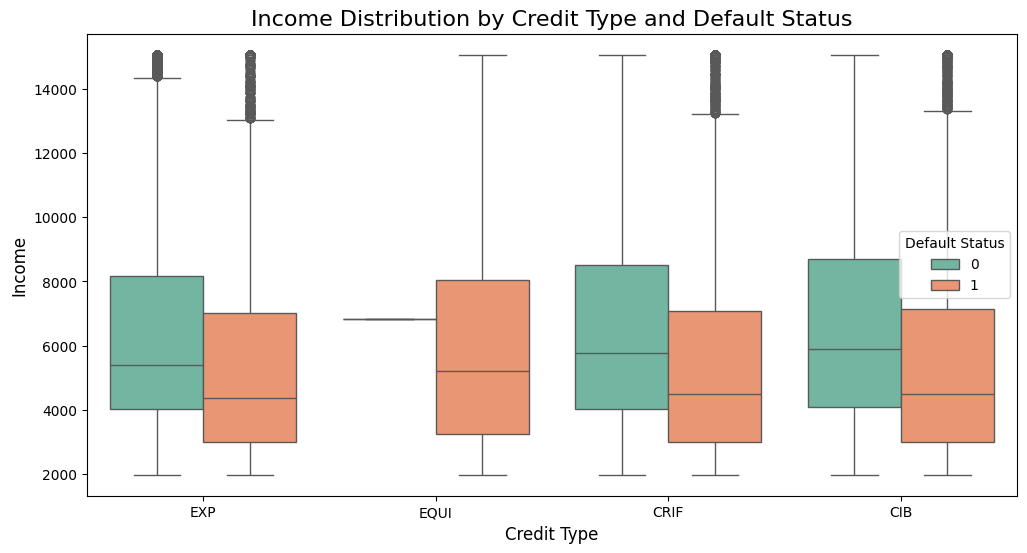

In [100]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data,
    x='Credit_Type',
    y='Income',
    hue='Status',
    palette='Set2'
)
plt.title('Income Distribution by Credit Type and Default Status', fontsize=16)
plt.xlabel('Credit Type', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.legend(title='Default Status')
plt.show()


#Insights

* Default vs Non-Default Income Disparity
  * Across all credit types, defaulters have consistently lower average incomes compared to non-defaulters
* EQUI as a Risk Outlier

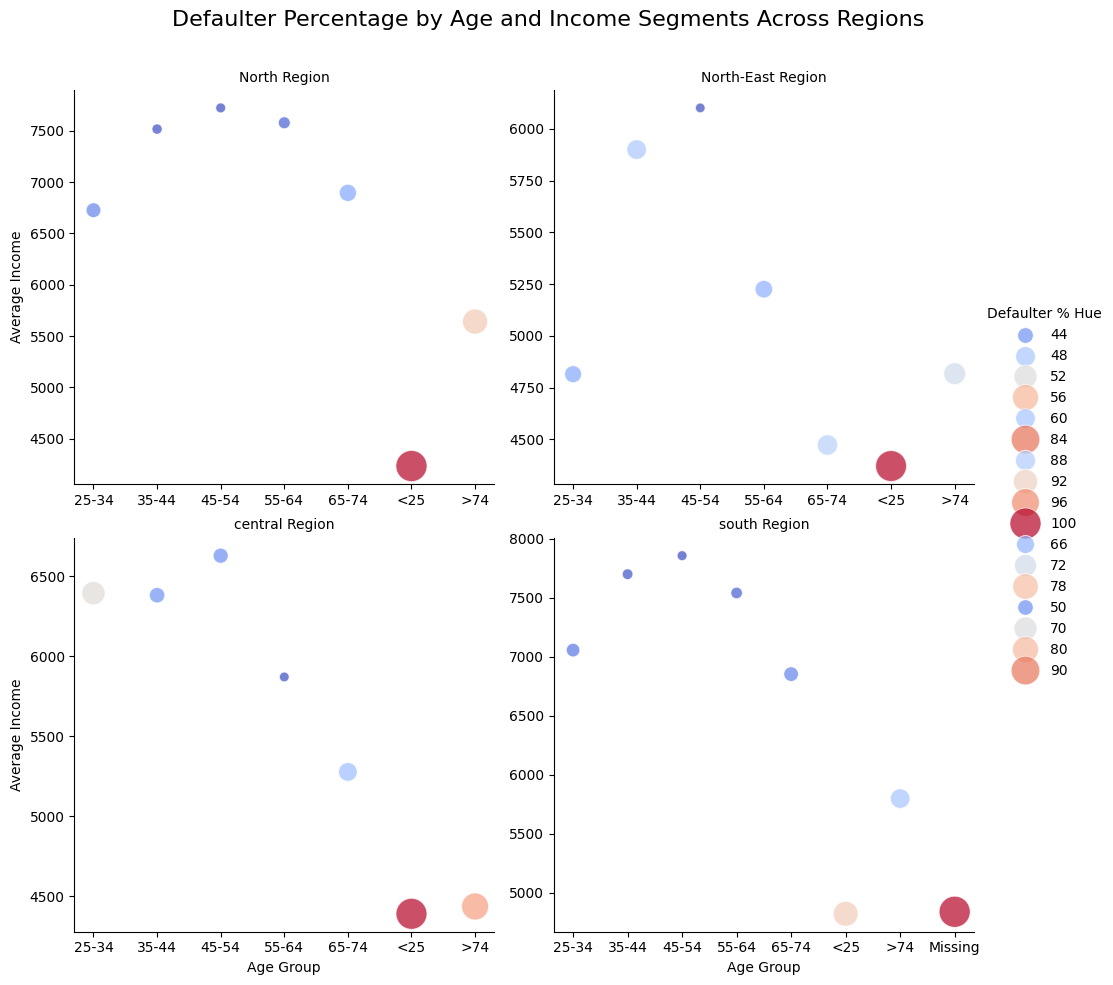

In [101]:
# Aggregate data for better clarity
grouped = segment.groupby(['Region', 'Age']).agg({
    'Income': 'mean',
    'Defaulter_Percentage': 'mean'
}).reset_index()

hue_order = segment['Defaulter_Percentage'].unique()

# Improved visualization with a FacetGrid
g = sns.FacetGrid(grouped, col="Region", col_wrap=2, height=5, sharex=False, sharey=False)
g.map_dataframe(
    sns.scatterplot,
    x='Age',
    y='Income',
    hue = 'Defaulter_Percentage',
    size='Defaulter_Percentage',
    sizes=(50, 500),
    alpha=0.7,
    hue_order = hue_order,
    palette='coolwarm'
)
g.set_axis_labels("Age Group", "Average Income")
g.set_titles("{col_name} Region")
g.add_legend(title="Defaulter % Hue")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Defaulter Percentage by Age and Income Segments Across Regions", fontsize=16)
plt.show()


#Insights

* Age Group <25:

  * Consistently displays the highest defaulter percentage across all regions.
  * This could be due to limited financial literacy or unstable income sources among younger individuals.

* Age Group 65-74:

  * Shows relatively low defaulter percentages, potentially indicating better financial stability and established credit behavior.

* Income vs. Default Rates:

  * Average income levels are inversely correlated with defaulter percentages across most regions and age groups.
  * Individuals in the <25 age group, despite having relatively lower income levels, demonstrate alarmingly high default rates. This indicates a potential income-to-expense mismatch or lack of financial planning.

* Regional Impact:

  * The North-East region's vulnerability requires targeted financial education or intervention, especially for younger age groups.
  * The South and Central regions maintain better control over default rates, suggesting stronger credit management practices.

In [102]:
data.columns

Index(['Year', 'Loan_Limit', 'Gender', 'Loan_Type', 'Loan_Purpose',
       'Business_or_Commercial', 'Loan_Amount', 'Rate_of_Interest',
       'Upfront_Charges', 'Property_Value', 'Occupancy_Type', 'Income',
       'Credit_Type', 'Credit_Score', 'Co-Applicant_Credit_Type', 'Age', 'LTV',
       'Region', 'Status', 'Loan_Amount_Bin', 'Rate_of_Interest_Bin',
       'Upfront_Charges_Bin', 'Property_Value_Bin', 'Income_Bin',
       'Credit_Score_Bin', 'LTV_Bin', 'Debt_to_Income', 'DTI_Category',
       'Upfront_Category', 'LTV_Category'],
      dtype='object')

In [104]:
segment.columns

Index(['Credit_Type', 'Region', 'Income', 'Age', 'Defaulter_Count',
       'Total_Count', 'Defaulter_Percentage'],
      dtype='object')

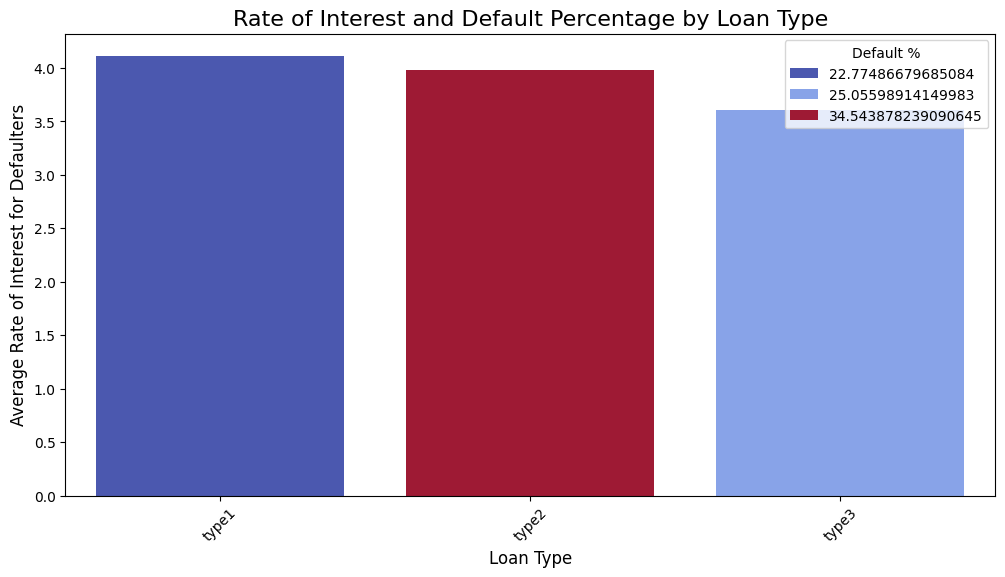

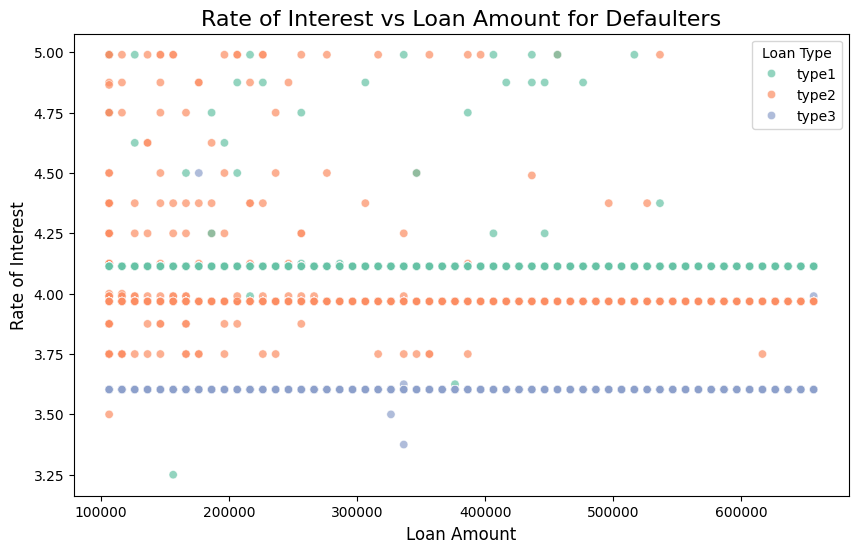

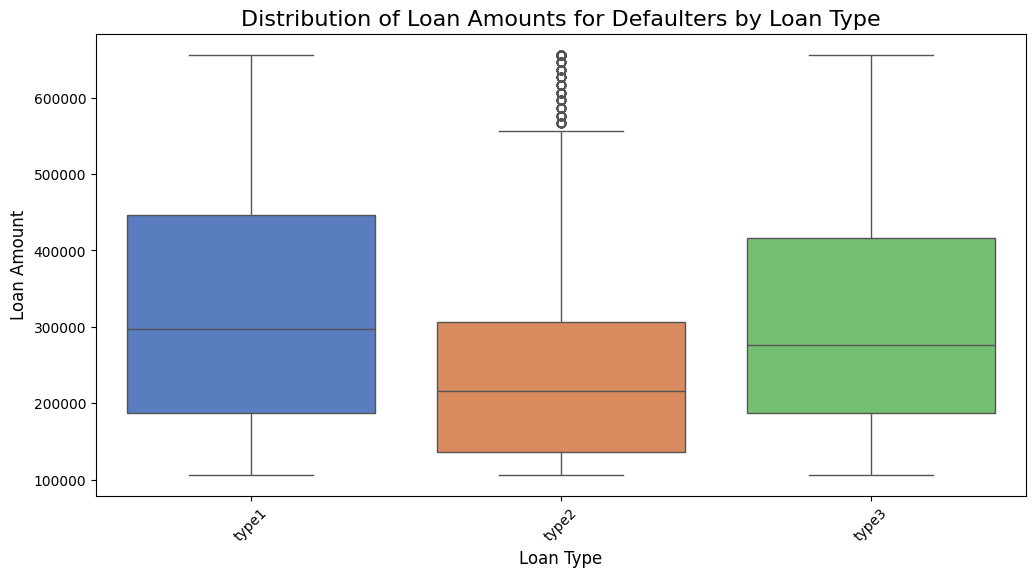

In [105]:
# Grouping data to analyze loan types with defaults
grouped_data = (
    data.groupby(['Loan_Type', 'Status'])
    .agg({
        'Rate_of_Interest': 'mean',
        'Loan_Amount': 'mean',
        'Loan_Purpose': 'count'  # Count of records in each group
    })
    .rename(columns={'Loan_Purpose': 'Count'})
    .reset_index()
)

# Calculate default percentages for each loan type
total_counts = grouped_data.groupby('Loan_Type')['Count'].transform('sum')
grouped_data['Default_Percentage'] = (
    grouped_data[grouped_data['Status'] == 1]['Count'] / total_counts
) * 100

# Visualize defaults by rate of interest and loan type
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_data[grouped_data['Status'] == 1],  # Focus on defaulters
    x='Loan_Type',
    y='Rate_of_Interest',
    hue='Default_Percentage',
    palette='coolwarm'
)
plt.title('Rate of Interest and Default Percentage by Loan Type', fontsize=16)
plt.xlabel('Loan Type', fontsize=12)
plt.ylabel('Average Rate of Interest for Defaulters', fontsize=12)
plt.legend(title='Default %', loc='upper right')
plt.xticks(rotation=45)
plt.show()

# Scatter plot: Rate of Interest vs Loan Amount for Defaulters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data[data['Status'] == 1],  # Focus on defaulters
    x='Loan_Amount',
    y='Rate_of_Interest',
    hue='Loan_Type',
    alpha=0.7,
    palette='Set2'
)
plt.title('Rate of Interest vs Loan Amount for Defaulters', fontsize=16)
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Rate of Interest', fontsize=12)
plt.legend(title='Loan Type')
plt.show()

# Box plot: Loan Amount for Defaulters by Loan Type
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data[data['Status'] == 1],
    x='Loan_Type',
    y='Loan_Amount',
    palette='muted'
)
plt.title('Distribution of Loan Amounts for Defaulters by Loan Type', fontsize=16)
plt.xlabel('Loan Type', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)
plt.xticks(rotation=45)
plt.show()


Insights

* Flat Rate of Interest Distribution:

  * The rate of interest seems to stay relatively consistent across the different loan amounts. Most of the data points for each loan type fall within the range of 3.6 to 4.5%, with type 3 loans having a slightly lower interest rate, around 3.8% to 4.0%, compared to type 1 and type 2 loans, which have rates ranging from 3.8% to 4.4%.
  * This suggests that there may be standard interest rates set for these loan types, and interest rates do not vary significantly with increasing loan amounts.
* Loan Amount Distribution:

  * Type 3 loans have the largest spread of loan amounts, with values ranging from around 100,000 to over 600,000. This implies that type 3 loans could be for larger or more significant financial needs, but with the lowest interest rate range among the types.
  * Type 2 loans have loan amounts primarily concentrated in the 150,000 to 350,000 range, with the rate of interest hovering around 4.0% to 4.2%.
  * Type 1 loans tend to have loan amounts more evenly distributed between 100,000 and 400,000, with the rate of interest mostly around 4.0% to 4.2%.

* Loan Type Analysis:

  * Type 1 and Type 2 loans appear to be concentrated around the same range of interest rates, suggesting that the loan amounts and terms for these types might be similar. However, the type 3 loans stand out with a broader spread, implying that they might have different conditions, perhaps tailored to higher-risk or high-value borrowers.
  * It is also possible that type 3 loans are extended for larger amounts but with slightly lower rates to attract borrowers, possibly indicating a subsidized or competitive offering to mitigate default risk.

* Potential Default Risk Correlation:

  * Although the interest rates are relatively flat across loan amounts, this does not necessarily indicate no default risk. The fact that defaulters exist across all loan types, even with low-interest rates for type 3 loans, suggests that default behavior may be influenced by factors beyond just interest rates.
  * A deeper analysis of other factors like credit score, loan purpose, loan limit, and income levels could reveal more about the potential risk of default, especially for higher-value loans

In [106]:
# Define numeric bins for Age and Income for better segmentation
segment['Income_Group'] = pd.cut(
    segment['Income'],
    bins=[0, 2000, 4000, 6000, 8000, 10000, 15000],
    labels=['<2k', '2k-4k', '4k-6k', '6k-8k', '8k-10k', '>10k']
)

# Group by Region, Age_Group, and Income_Group
numeric_summary = segment.groupby(['Region', 'Age', 'Income_Group']).agg({
    'Defaulter_Percentage': 'mean',  # Average defaulter percentage
    'Income': 'mean'             # Average income
    #'Defaulter_Percentage': 'count' # Count of records
}).rename(columns={'Defaulter_Percentage': 'Defaulter_Count'})

# Reset index for readability
numeric_summary.reset_index(inplace=True)

# Display summarized table
numeric_summary

# Export to CSV for easy sharing/analysis if required
#numeric_summary.to_csv("Defaulter_Summary_by_Segment.csv", index=False)


,Region,Age,Income_Group,Defaulter_Count,Income
0,North,25-34,<2k,56.456044,1980.000000
1,North,25-34,2k-4k,40.499400,3019.069767
2,North,25-34,4k-6k,35.214358,4978.604651
3,North,25-34,6k-8k,37.934896,7036.756757
4,North,25-34,8k-10k,48.745961,8945.925926
...,...,...,...,...,...
187,south,Missing,2k-4k,100.000000,3900.000000
188,south,Missing,4k-6k,100.000000,4380.000000
189,south,Missing,6k-8k,100.000000,6240.000000
190,south,Missing,8k-10k,NaN,NaN


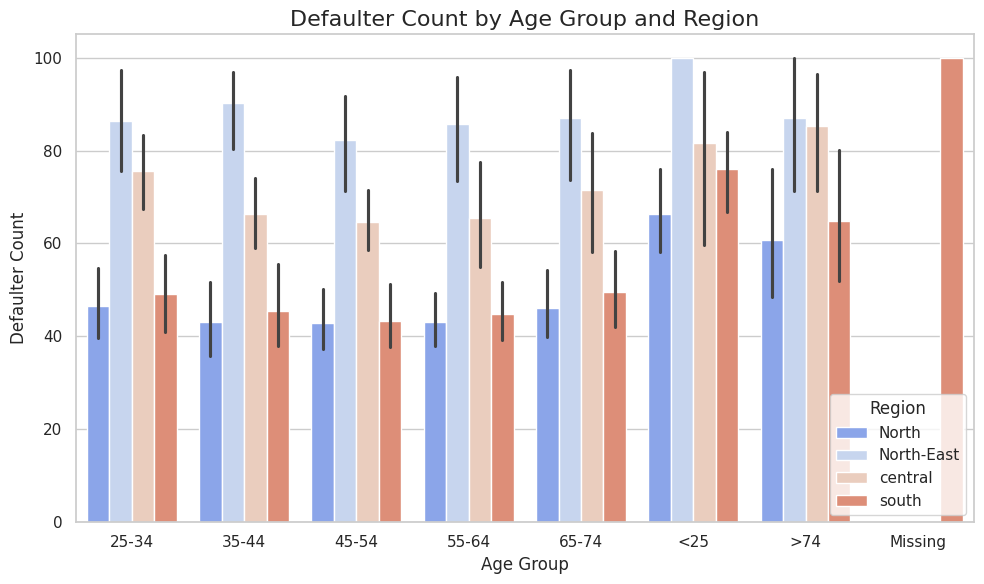

In [109]:
sns.set(style="whitegrid")

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Age',
    y='Defaulter_Count',
    hue='Region',
    data=numeric_summary,
    palette='coolwarm'
)

# Add titles and labels
plt.title('Defaulter Count by Age Group and Region', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Defaulter Count', fontsize=12)
plt.legend(title='Region')

# Show the plot
plt.tight_layout()
plt.show()